In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')


# Load BASELINE datasets
df_baseline_mem_available = pd.read_csv("baseline/mem_available.csv")
df_baseline_mem_cache = pd.read_csv("baseline/mem_cache.csv")
df_baseline_mem_util = pd.read_csv("baseline/mem_util.csv")

# Load CPU STRESS datasets
df_cpustress_mem_available = pd.read_csv("cpu stress/mem_available.csv")
df_cpustress_mem_cache = pd.read_csv("cpu stress/mem_cache.csv")
df_cpustress_mem_util = pd.read_csv("cpu stress/mem_util.csv")

# Load IO datasets
df_IO_mem_available = pd.read_csv("IO pressure/mem_available.csv")
df_IO_mem_cache = pd.read_csv("IO pressure/mem_cache.csv")
df_IO_mem_util = pd.read_csv("IO pressure/mem_util.csv")

# Load MEM STRESS datasets
df_memstress_mem_available = pd.read_csv("mem stress/mem_available.csv")
df_memstress_mem_cache = pd.read_csv("mem stress/mem_cache.csv")
df_memstress_mem_util = pd.read_csv("mem stress/mem_util.csv")

# Load NET LOSS datasets
df_netloss_mem_available = pd.read_csv("net loss/mem_available.csv")
df_netloss_mem_cache = pd.read_csv("net loss/mem_cache.csv")
df_netloss_mem_util = pd.read_csv("net loss/mem_util.csv")


# Add source labels - BASELINE
df_baseline_mem_available["source"] = "BASELINE"
df_baseline_mem_cache["source"] = "BASELINE"
df_baseline_mem_util["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_mem_available["source"] = "CPU_STRESS"
df_cpustress_mem_cache["source"] = "CPU_STRESS"
df_cpustress_mem_util["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_IO_mem_available["source"] = "DELAY"
df_IO_mem_cache["source"] = "DELAY"
df_IO_mem_util["source"] = "DELAY"

# Add source labels - MEM STRESS
df_memstress_mem_available["source"] = "MEM_STRESS"
df_memstress_mem_cache["source"] = "MEM_STRESS"
df_memstress_mem_util["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_mem_available["source"] = "NET_LOSS"
df_netloss_mem_cache["source"] = "NET_LOSS"
df_netloss_mem_util["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_mem_available["Time"] = pd.to_datetime(df_baseline_mem_available["Time"])
df_baseline_mem_cache["Time"] = pd.to_datetime(df_baseline_mem_cache["Time"])
df_baseline_mem_util["Time"] = pd.to_datetime(df_baseline_mem_util["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_mem_available["Time"] = pd.to_datetime(df_cpustress_mem_available["Time"])
df_cpustress_mem_cache["Time"] = pd.to_datetime(df_cpustress_mem_cache["Time"])
df_cpustress_mem_util["Time"] = pd.to_datetime(df_cpustress_mem_util["Time"])

# Convert to datetime - DELAY
df_IO_mem_available["Time"] = pd.to_datetime(df_IO_mem_available["Time"])
df_IO_mem_cache["Time"] = pd.to_datetime(df_IO_mem_cache["Time"])
df_IO_mem_util["Time"] = pd.to_datetime(df_IO_mem_util["Time"])

# Convert to datetime - MEM STRESS
df_memstress_mem_available["Time"] = pd.to_datetime(df_memstress_mem_available["Time"])
df_memstress_mem_cache["Time"] = pd.to_datetime(df_memstress_mem_cache["Time"])
df_memstress_mem_util["Time"] = pd.to_datetime(df_memstress_mem_util["Time"])

# Convert to datetime - NET LOSS
df_netloss_mem_available["Time"] = pd.to_datetime(df_netloss_mem_available["Time"])
df_netloss_mem_cache["Time"] = pd.to_datetime(df_netloss_mem_cache["Time"])
df_netloss_mem_util["Time"] = pd.to_datetime(df_netloss_mem_util["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_mem_available["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_mem_available["Time"].min()
df_cpustress_mem_available["Time"] += cpustress_offset
df_cpustress_mem_cache["Time"] += cpustress_offset
df_cpustress_mem_util["Time"] += cpustress_offset

# Synchronize IO pressure datasets
delay_offset = time_offset - df_IO_mem_available["Time"].min()
df_IO_mem_available["Time"] += delay_offset
df_IO_mem_cache["Time"] += delay_offset
df_IO_mem_util["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_mem_available["Time"].min()
df_memstress_mem_available["Time"] += memstress_offset
df_memstress_mem_cache["Time"] += memstress_offset
df_memstress_mem_util["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_mem_available["Time"].min()
df_netloss_mem_available["Time"] += netloss_offset
df_netloss_mem_cache["Time"] += netloss_offset
df_netloss_mem_util["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_mem_available, df_baseline_mem_cache, df_baseline_mem_util,
    # CPU Stress
    df_cpustress_mem_available, df_cpustress_mem_cache, df_cpustress_mem_util,
    # IO pressure
    df_IO_mem_available, df_IO_mem_cache, df_IO_mem_util,
    # Memory Stress
    df_memstress_mem_available, df_memstress_mem_cache, df_memstress_mem_util,
    # Network Loss
    df_netloss_mem_available, df_netloss_mem_cache, df_netloss_mem_util
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'MemAvailable': {
        'baseline': df_baseline_mem_available,
        'cpu_stress': df_cpustress_mem_available,
        'IO pressure': df_IO_mem_available,
        'mem_stress': df_memstress_mem_available,
        'net_loss': df_netloss_mem_available,
    },
    'MemCache': {
        'baseline': df_baseline_mem_cache,
        'cpu_stress': df_cpustress_mem_cache,
        'IO pressure': df_IO_mem_cache,
        'mem_stress': df_memstress_mem_cache,
        'net_loss': df_netloss_mem_cache,
    },
    'MemUtil': {
        'baseline': df_baseline_mem_util,
        'cpu_stress': df_cpustress_mem_util,
        'IO pressure': df_IO_mem_util,
        'mem_stress': df_memstress_mem_util,
        'net_loss': df_netloss_mem_util,
    }
}

print("✅ All memory datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} memory metrics across {len(all_datasets['MemAvailable'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All memory datasets loaded successfully!
📊 Loaded 3 memory metrics across 5 experiment types

Dataset structure:
  MemAvailable: ['baseline', 'cpu_stress', 'IO', 'mem_stress', 'net_loss']
  MemCache: ['baseline', 'cpu_stress', 'IO', 'mem_stress', 'net_loss']
  MemUtil: ['baseline', 'cpu_stress', 'IO', 'mem_stress', 'net_loss']



🔄 Processing metric: MemAvailable
  📊 Data columns: ['mem_available']
    🤖 Training model for column: mem_available
  🔄 Processing experiment: baseline
  🔄 Processing experiment: cpu_stress
  🔄 Processing experiment: IO
  🔄 Processing experiment: mem_stress
  🔄 Processing experiment: net_loss

🔄 Processing metric: MemCache
  📊 Data columns: ['mem_cache']
    🤖 Training model for column: mem_cache
  🔄 Processing experiment: baseline
  🔄 Processing experiment: cpu_stress
  🔄 Processing experiment: IO
  🔄 Processing experiment: mem_stress
  🔄 Processing experiment: net_loss

🔄 Processing metric: MemUtil
  📊 Data columns: ['mem_util']
    🤖 Training model for column: mem_util
  🔄 Processing experiment: baseline
  🔄 Processing experiment: cpu_stress
  🔄 Processing experiment: IO
  🔄 Processing experiment: mem_stress
  🔄 Processing experiment: net_loss


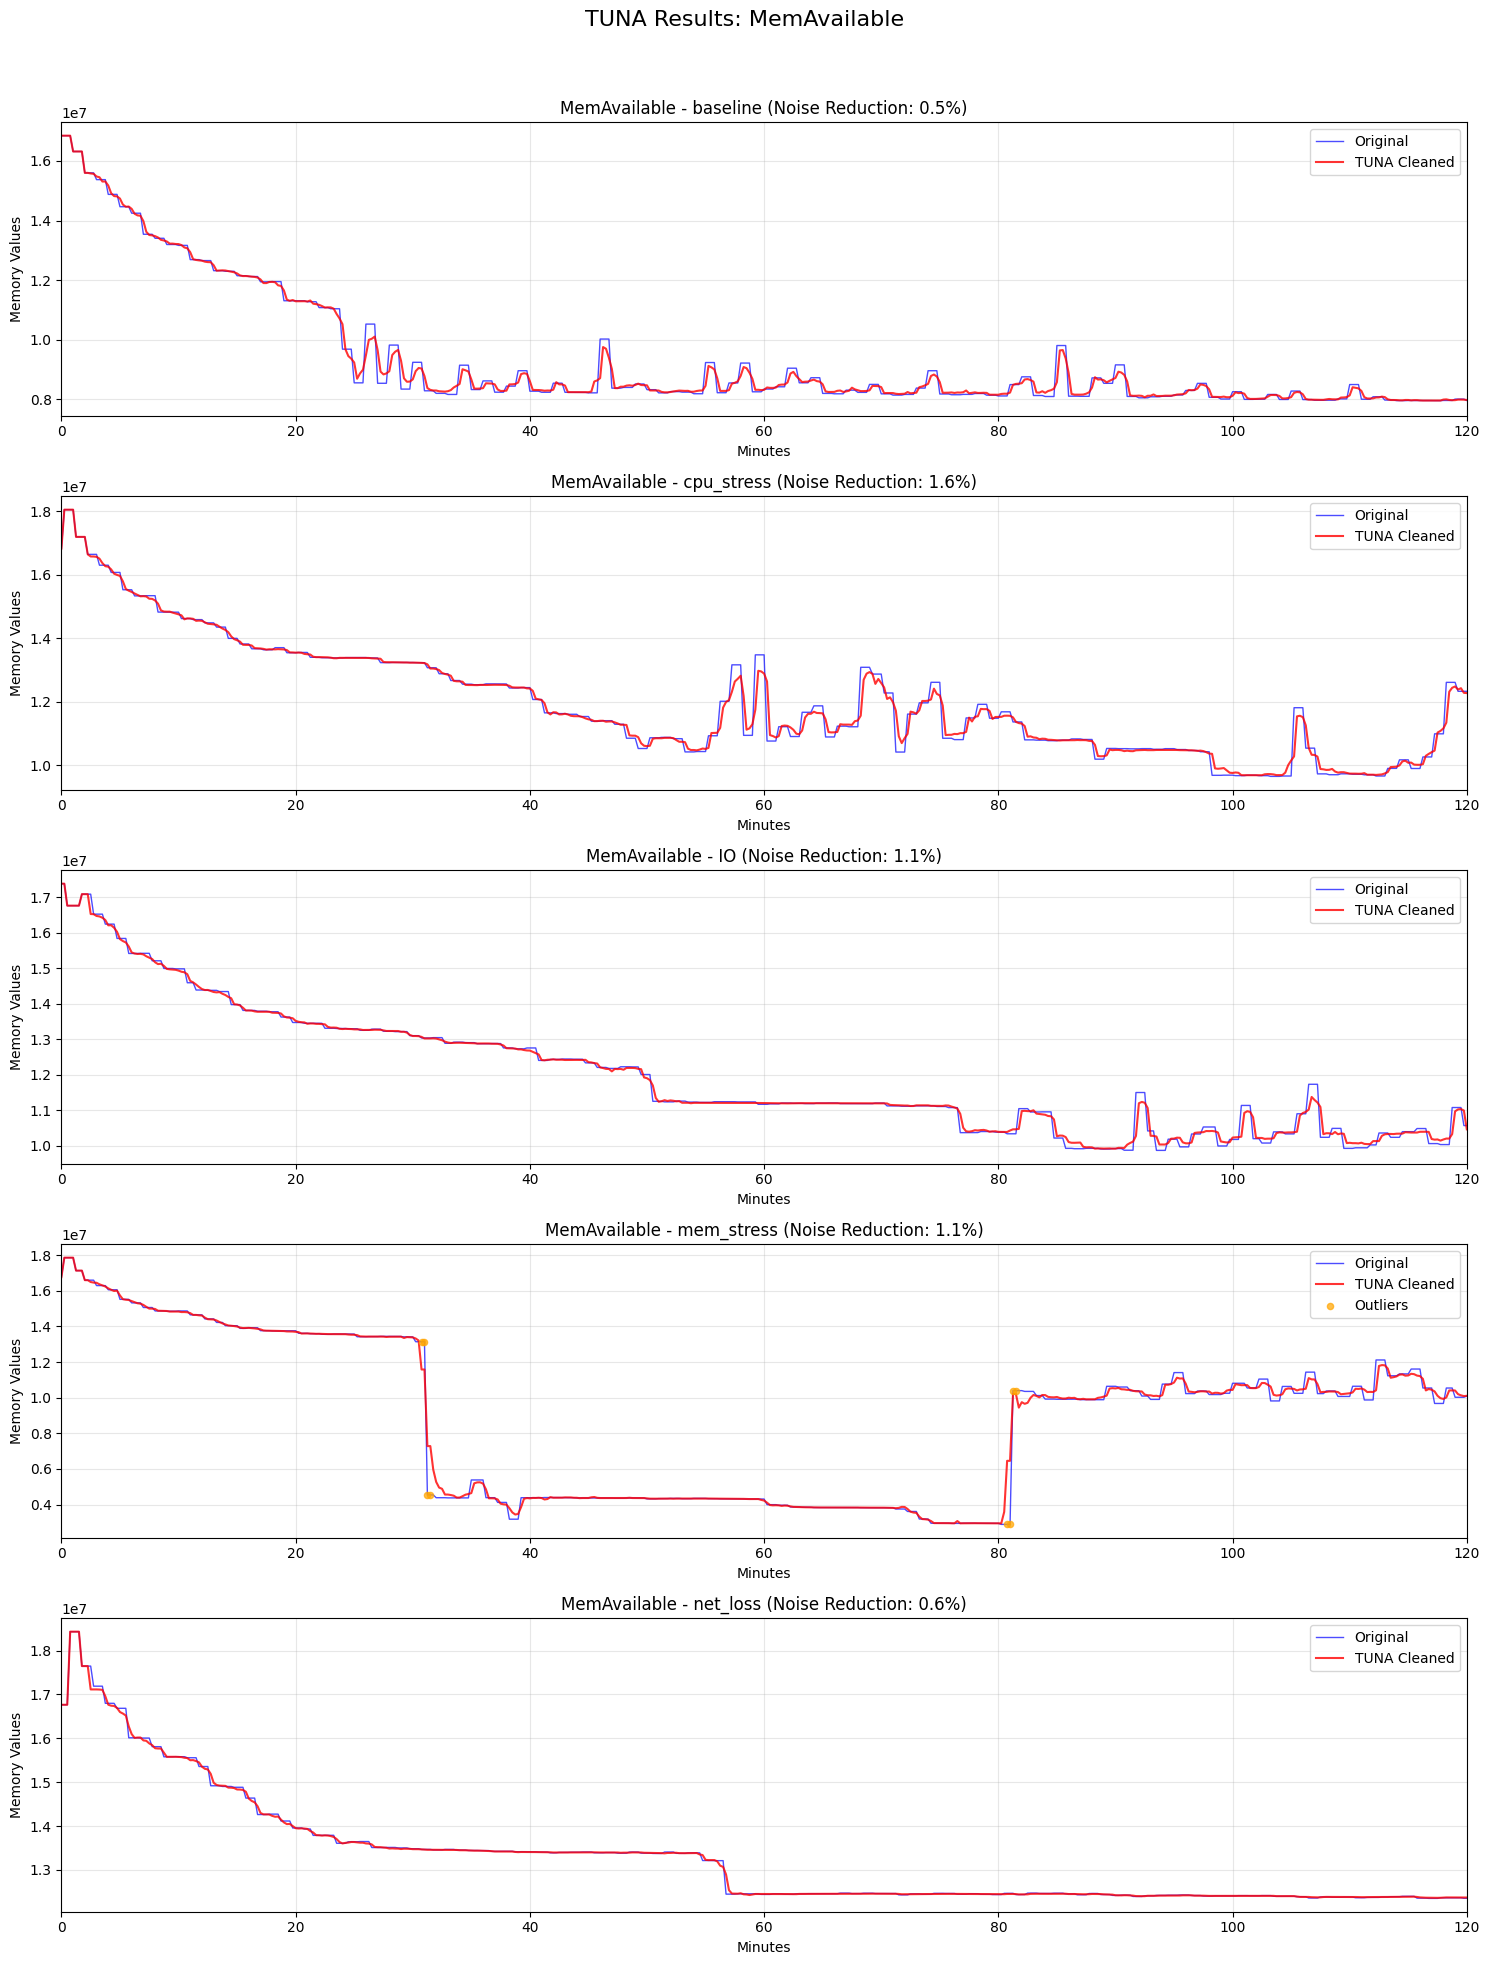

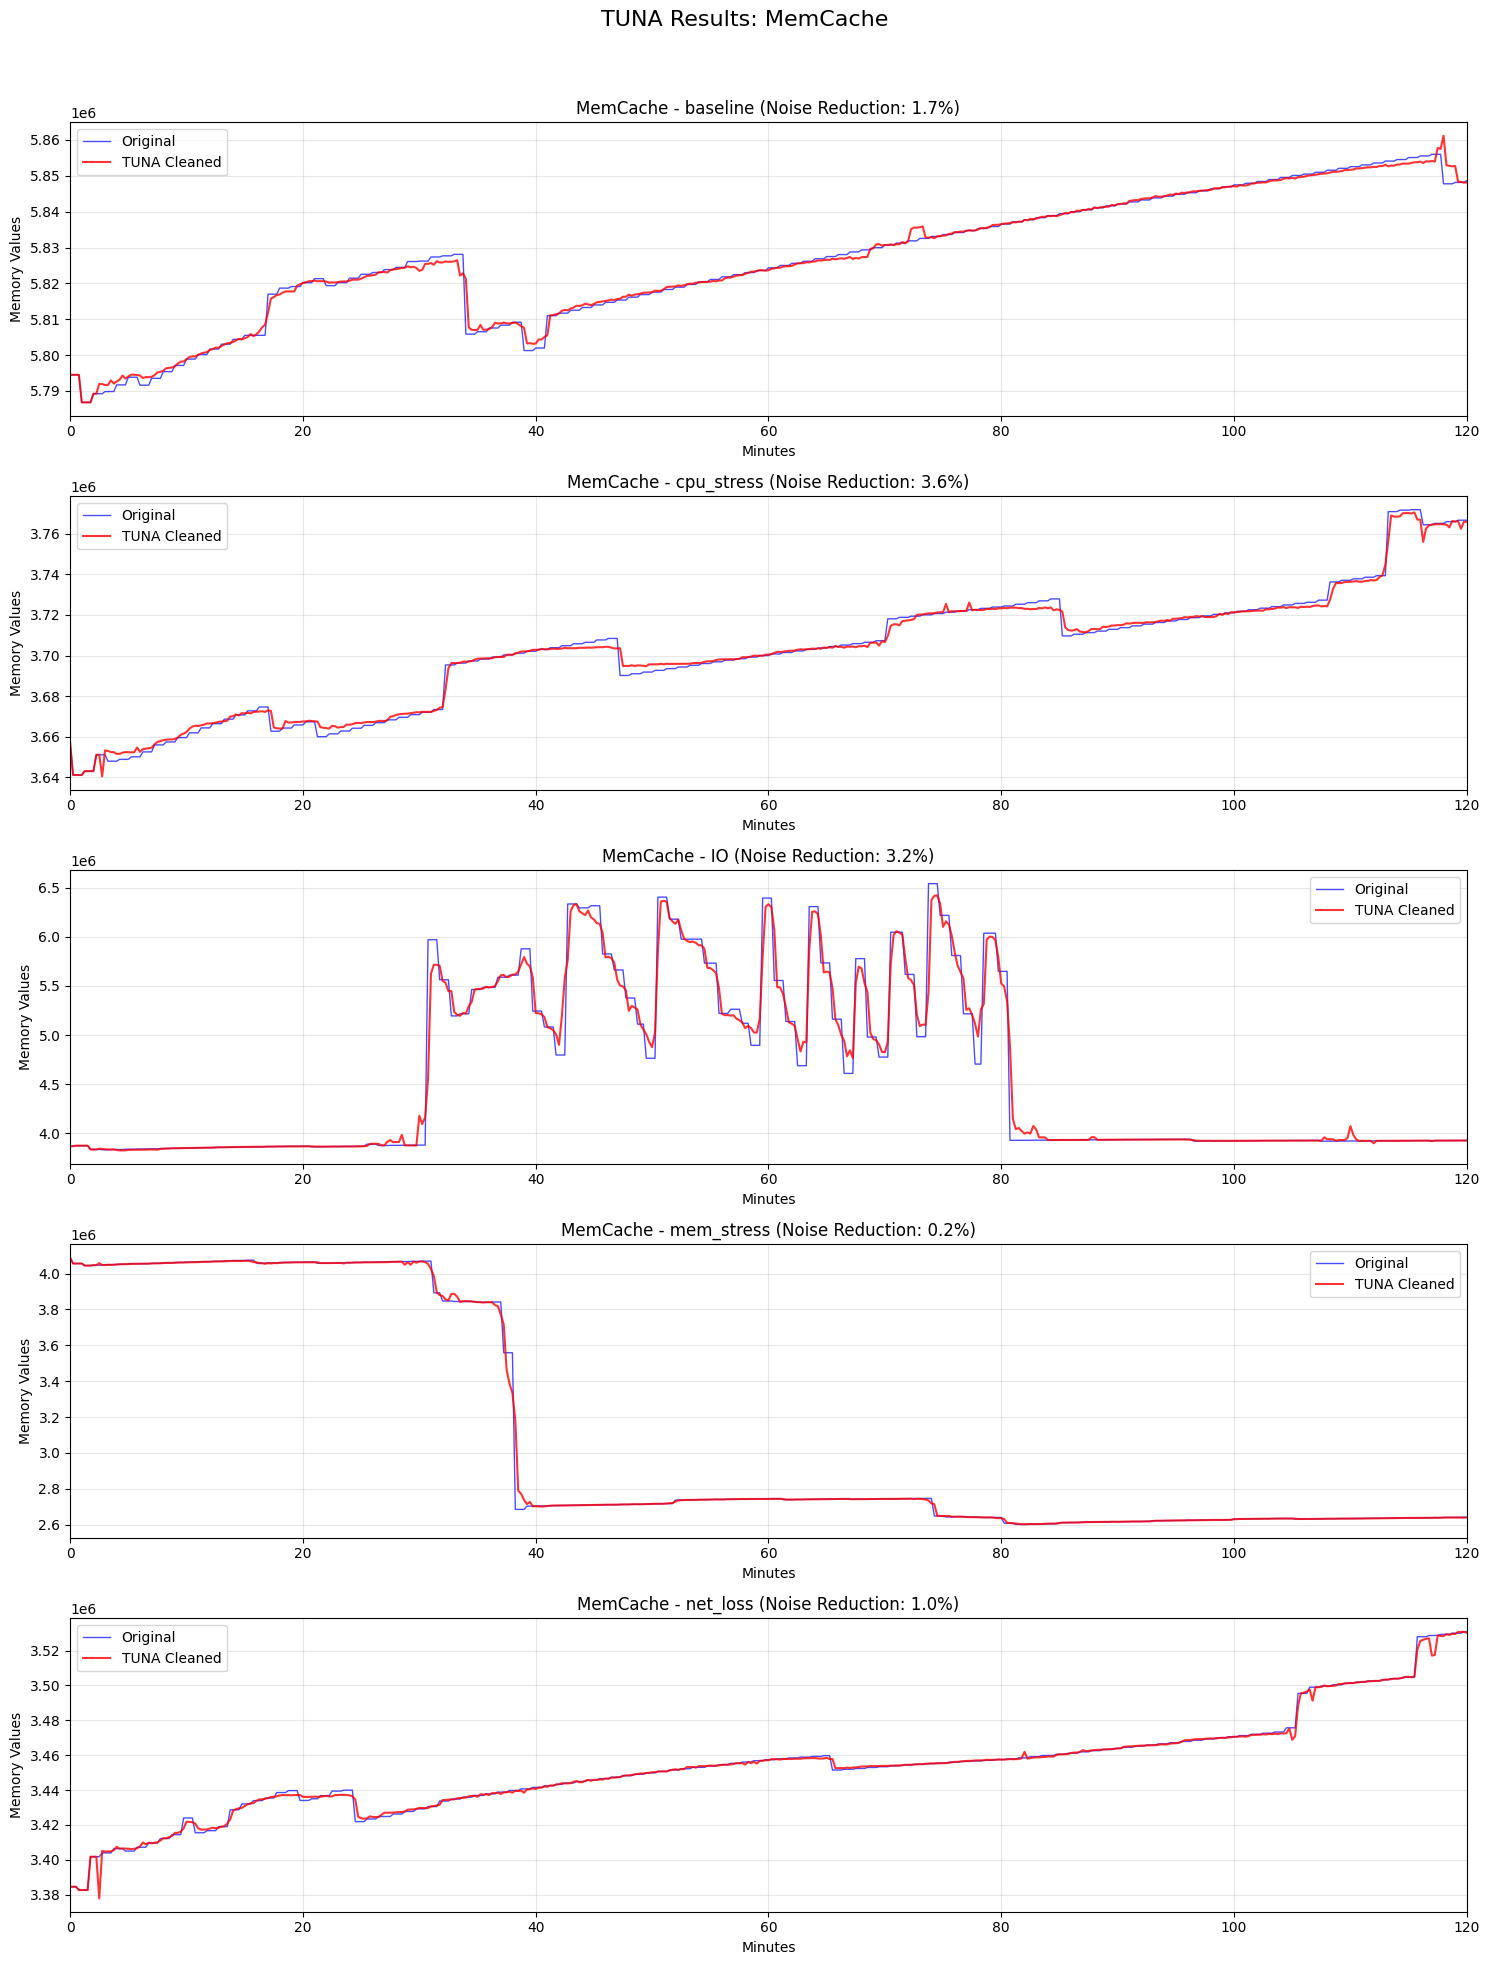

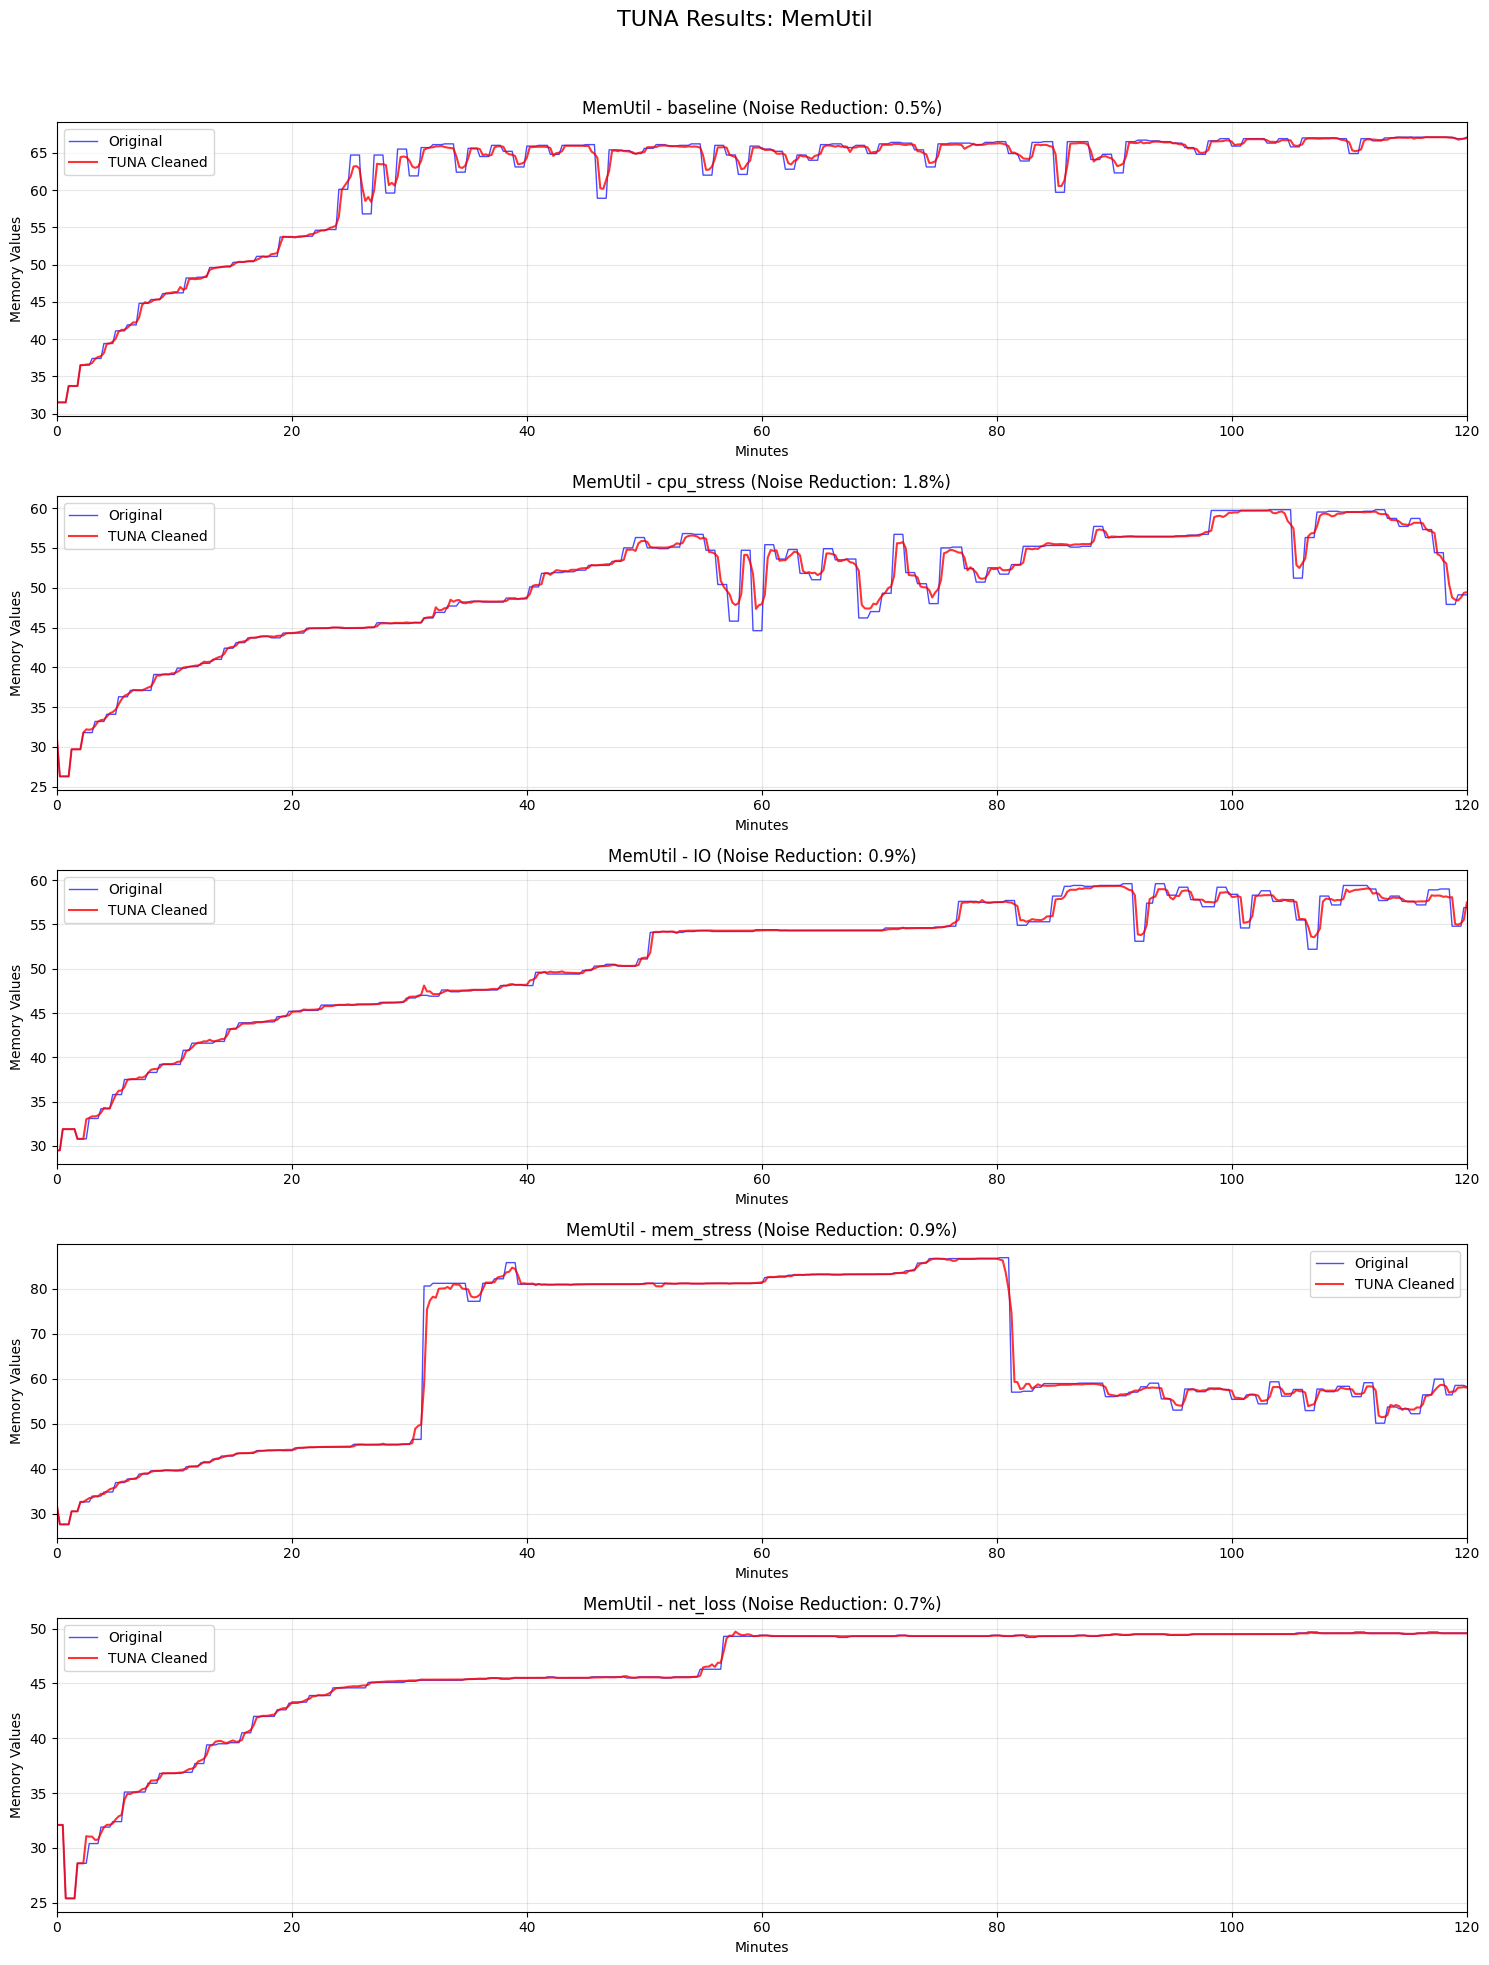


Column-by-Column TUNA Results Summary:
Metric          Experiment   Column          Outliers   Noise Red%   Correlation 
--------------------------------------------------------------------------------
MemAvailable    baseline     mem_available   0                 0.5%       0.995
MemAvailable    cpu_stress   mem_available   0                 1.6%       0.991
MemAvailable    IO           mem_available   0                 1.1%       0.997
MemAvailable    mem_stress   mem_available   8                 1.1%       0.996
MemAvailable    net_loss     mem_available   0                 0.6%       0.999
MemCache        baseline     mem_cache       0                 1.7%       0.997
MemCache        cpu_stress   mem_cache       0                 3.6%       0.997
MemCache        IO           mem_cache       0                 3.2%       0.985
MemCache        mem_stress   mem_cache       0                 0.2%       0.999
MemCache        net_loss     mem_cache       0                 1.0%       0.9

In [2]:
def safe_convert_to_float(series):
    try:
        return pd.to_numeric(series, errors='coerce').fillna(0.0).astype(float)
    except:
        return series.fillna(0.0).astype(float)

def safe_array_conversion(data):
    data = np.array(data, dtype=float)
    if np.any(np.isnan(data)):
        median_val = np.nanmedian(data)
        if np.isnan(median_val):
            median_val = 0.0
        data = np.nan_to_num(data, nan=median_val)
    return data

def get_data_columns(df):
    """Get columns that contain actual data (excluding time/metadata columns)"""
    exclude_cols = ['Time', 'Minutes', 'source']
    return [col for col in df.columns if col not in exclude_cols]

def detect_outliers_tuna(timeseries, window_size=3, threshold=0.65, min_absolute_range=None):
    timeseries = safe_array_conversion(timeseries)
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    if min_absolute_range is None:
        std_val = np.std(timeseries)
        if std_val == 0 or np.isnan(std_val):
            min_absolute_range = 0.01 * np.max(timeseries)
        else:
            min_absolute_range = 0.1 * std_val
    
    if min_absolute_range <= 0:
        min_absolute_range = 1e-6
    
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0 and window_range > 0:
            relative_range = window_range / window_mean
            
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                for j in range(window_size):
                    actual_idx = i + j
                    if (timeseries[actual_idx] == window_max or 
                        timeseries[actual_idx] == window_min):
                        outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    timeseries = safe_array_conversion(timeseries)
    features = []
    
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        feature_vector = [
            np.mean(window),
            np.std(window),
            np.median(window),
            np.max(window) - np.min(window),
            timeseries[i-1],
            i / len(timeseries),
        ]
        
        feature_vector = [0.0 if np.isnan(val) or np.isinf(val) else float(val) for val in feature_vector]
        
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_column(column_name, column_data_dict, experiments_dict):
    """Train a random forest model for a specific column across all experiments"""
    X_stable_all = []
    y_stable_all = []
    
    for exp_name, column_values in column_data_dict.items():
        column_values = safe_array_conversion(column_values)
        
        outlier_mask = detect_outliers_tuna(column_values)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(column_values, exp_name)
        if len(features) > 0:
            stable_features_mask = stable_mask[10:10+len(features)]
            stable_features = features[stable_features_mask]
            stable_targets = column_values[10:10+len(features)][stable_features_mask]
            
            valid_mask = ~(np.isnan(stable_targets) | np.isinf(stable_targets))
            stable_features = stable_features[valid_mask]
            stable_targets = stable_targets[valid_mask]
            
            if len(stable_features) > 0:
                smoothed_targets = []
                for j, target in enumerate(stable_targets):
                    start_idx = max(0, j-2)
                    end_idx = min(len(stable_targets), j+3)
                    local_values = stable_targets[start_idx:end_idx]
                    smoothed_targets.append(np.median(local_values))
                
                X_stable_all.extend(stable_features)
                y_stable_all.extend(smoothed_targets)
    
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Clean NaN values
    nan_mask = np.isnan(y_stable_all) | np.isinf(y_stable_all)
    if np.any(nan_mask):
        X_stable_all = X_stable_all[~nan_mask]
        y_stable_all = y_stable_all[~nan_mask]
    
    feature_nan_mask = np.isnan(X_stable_all).any(axis=1) | np.isinf(X_stable_all).any(axis=1)
    if np.any(feature_nan_mask):
        X_stable_all = X_stable_all[~feature_nan_mask]
        y_stable_all = y_stable_all[~feature_nan_mask]
    
    if len(X_stable_all) < 10:
        return None, None
    
    try:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_stable_all)

        model = RandomForestRegressor(
            n_estimators=50,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42,
            n_jobs=1
        )
        
        model.fit(X_scaled, y_stable_all)
        return model, scaler
    except Exception:
        return None, None

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.5):
    timeseries = safe_array_conversion(timeseries)
    cleaned_series = timeseries.copy()
    
    stable_values = timeseries[~outlier_mask]
    if len(stable_values) > 0:
        baseline = np.median(stable_values)
    else:
        baseline = np.median(timeseries)
    
    if np.isnan(baseline):
        baseline = 0.0
    
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            original_value = timeseries[i]
            if np.isnan(original_value):
                cleaned_series[i] = baseline
            else:
                cleaned_series[i] = baseline + (original_value - baseline) * penalty_factor
    
    return cleaned_series

def apply_tuna_to_single_column(column_values, exp_name, model, scaler, penalty_factor=0.5):
    """Apply TUNA to a single column"""
    column_values = safe_array_conversion(column_values)
    
    outlier_mask = detect_outliers_tuna(column_values)
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    cleaned_series = apply_penalty(column_values, outlier_mask, penalty_factor)
    
    if model is not None and scaler is not None:
        try:
            features = create_features_for_ml(column_values, exp_name)
            if len(features) > 0:
                features_scaled = scaler.transform(features)
                ml_predictions = model.predict(features_scaled)
                
                for i, prediction in enumerate(ml_predictions):
                    actual_idx = i + 10
                    if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                        if not np.isnan(prediction) and not np.isinf(prediction):
                            cleaned_series[actual_idx] = prediction
        except Exception:
            pass
    
    original_std = np.std(column_values)
    cleaned_std = np.std(cleaned_series)
    
    if original_std > 0 and not np.isnan(original_std):
        noise_reduction = (original_std - cleaned_std) / original_std * 100
    else:
        noise_reduction = 0.0
    
    if len(column_values) > 1:
        correlation = np.corrcoef(column_values, cleaned_series)[0, 1]
        if np.isnan(correlation):
            correlation = 1.0
    else:
        correlation = 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'outlier_percentage': (outliers_count / len(column_values)) * 100,
        'noise_reduction': noise_reduction,
        'correlation': correlation
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_for_all_metrics_column_by_column(all_datasets):
    """Run TUNA processing column by column for all metrics"""
    tuna_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"\n🔄 Processing metric: {metric_name}")
        
        # Get all data columns for this metric
        sample_df = next(iter(experiments.values()))
        data_columns = get_data_columns(sample_df)
        
        print(f"  📊 Data columns: {data_columns}")
        
        # Train models for each column
        column_models = {}
        for col in data_columns:
            print(f"    🤖 Training model for column: {col}")
            
            # Collect column data across all experiments
            column_data_dict = {}
            for exp_name, df in experiments.items():
                if col in df.columns:
                    column_data_dict[exp_name] = safe_convert_to_float(df[col])
            
            if column_data_dict:
                model, scaler = train_random_forest_for_column(col, column_data_dict, experiments)
                column_models[col] = (model, scaler)
            else:
                column_models[col] = (None, None)
        
        # Process each experiment
        metric_results = {}
        for exp_name, df in experiments.items():
            print(f"  🔄 Processing experiment: {exp_name}")
            
            column_results = {}
            overall_stats = {'outliers': 0, 'noise_reduction': 0.0, 'correlation': 0.0}
            
            # Process each column
            for col in data_columns:
                if col in df.columns:
                    column_values = safe_convert_to_float(df[col])
                    model, scaler = column_models[col]
                    
                    cleaned_series, outlier_mask, stats = apply_tuna_to_single_column(
                        column_values, exp_name, model, scaler
                    )
                    
                    column_results[col] = {
                        'original': column_values.values,
                        'cleaned': cleaned_series,
                        'outliers': outlier_mask,
                        'stats': stats
                    }
                    
                    # Accumulate overall stats
                    overall_stats['outliers'] += stats['outliers']
                    overall_stats['noise_reduction'] += stats['noise_reduction']
                    overall_stats['correlation'] += stats['correlation']
            
            # Average the overall stats
            if len(column_results) > 0:
                overall_stats['noise_reduction'] /= len(column_results)
                overall_stats['correlation'] /= len(column_results)
            
            metric_results[exp_name] = {
                'column_results': column_results,
                'stats': overall_stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results_column_by_column(tuna_results, all_datasets):
    """Plot results for column-by-column processing - using same format as original"""
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        for i, (exp_name, results) in enumerate(metric_results.items()):
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            # For column-by-column, we'll plot the first/main column or aggregate if multiple
            column_results = results['column_results']
            
            if len(column_results) == 1:
                # Single column - plot directly
                col_name = list(column_results.keys())[0]
                col_results = column_results[col_name]
                original = col_results['original']
                cleaned = col_results['cleaned']
                outliers = col_results['outliers']
                stats = col_results['stats']
            else:
                # Multiple columns - aggregate for visualization
                # Take the first column as representative, or could sum/average
                col_name = list(column_results.keys())[0]
                col_results = column_results[col_name]
                original = col_results['original']
                cleaned = col_results['cleaned']
                outliers = col_results['outliers']
                stats = results['stats']  # Use overall stats for multiple columns
            
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            # Determine y-label based on metric type
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT Values'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            elif 'mem' in metric_name.lower():
                y_label = 'Memory Values'
            else:
                y_label = 'Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120) 
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary_column_by_column(tuna_results):
    """Print summary for column-by-column processing"""
    print("\nColumn-by-Column TUNA Results Summary:")
    print("="*80)
    print(f"{'Metric':<15} {'Experiment':<12} {'Column':<15} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*80)
    
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            for col_name, col_results in results['column_results'].items():
                stats = col_results['stats']
                print(f"{metric_name:<15} {exp_name:<12} {col_name:<15} {stats['outliers']:<10} "
                      f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

def create_cleaned_csv_from_tuna_columns(original_df, column_results, metric_name, experiment_name, include_metadata=False):
    """Create cleaned CSV from column-by-column results"""
    cleaned_df = original_df.copy()
    
    # Replace each column with its cleaned version
    for col, col_results in column_results.items():
        if col in cleaned_df.columns:
            cleaned_series = col_results['cleaned']
            cleaned_df[col] = cleaned_series[:len(cleaned_df)]
    
    if include_metadata:
        # Add overall metadata
        total_outliers = sum(col_results['stats']['outliers'] for col_results in column_results.values())
        avg_noise_reduction = sum(col_results['stats']['noise_reduction'] for col_results in column_results.values()) / len(column_results)
        avg_correlation = sum(col_results['stats']['correlation'] for col_results in column_results.values()) / len(column_results)
        
        cleaned_df['tuna_processed'] = True
        cleaned_df['tuna_total_outliers'] = total_outliers
        cleaned_df['tuna_avg_noise_reduction'] = avg_noise_reduction
        cleaned_df['tuna_avg_correlation'] = avg_correlation
        cleaned_df['tuna_metric_name'] = metric_name
        cleaned_df['tuna_experiment'] = experiment_name
        
        # Add column-specific metadata
        for col, col_results in column_results.items():
            stats = col_results['stats']
            outlier_mask = col_results['outliers']
            cleaned_df[f'tuna_{col}_outliers'] = stats['outliers']
            cleaned_df[f'tuna_{col}_noise_reduction'] = stats['noise_reduction']
            cleaned_df[f'tuna_{col}_correlation'] = stats['correlation']
            cleaned_df[f'tuna_{col}_outlier_flag'] = outlier_mask[:len(cleaned_df)]
    
    return cleaned_df

def export_all_cleaned_csvs(tuna_results, all_datasets, output_base_path="cleaned_memory_data", include_metadata=False, preserve_structure=True):
    """Export all TUNA-cleaned datasets organized by experiment type"""
    output_base = Path(output_base_path)
    output_base.mkdir(parents=True, exist_ok=True)
    
    created_files = {}
    total_files = 0
    
    # Get all experiment types from all metrics
    experiment_types = set()
    for metric_results in tuna_results.values():
        experiment_types.update(metric_results.keys())
    
    print(f"📁 Creating directories for experiments: {sorted(experiment_types)}")
    
    # Create directory structure by experiment type
    for exp_name in experiment_types:
        exp_dir = output_base / exp_name
        exp_dir.mkdir(exist_ok=True)
        created_files[exp_name] = []
    
    # Process each metric and experiment
    for metric_name, metric_results in tuna_results.items():
        print(f"\n📊 Processing {metric_name}...")
        
        for exp_name, results in metric_results.items():
            print(f"  🔄 Exporting {exp_name}...")
            
            # Get original dataframe and column results
            original_df = all_datasets[metric_name][exp_name]
            column_results = results['column_results']
            
            # Create cleaned dataframe
            cleaned_df = create_cleaned_csv_from_tuna_columns(
                original_df=original_df,
                column_results=column_results,
                metric_name=metric_name,
                experiment_name=exp_name,
                include_metadata=include_metadata
            )
            
            # Print detailed column statistics
            for col, col_result in column_results.items():
                col_stats = col_result['stats']
                print(f"    📈 {col}: {col_stats['outliers']} outliers, {col_stats['noise_reduction']:.1f}% noise reduction")
            
            csv_filename = f"{metric_name.lower()}_{exp_name}.csv"
            csv_path = output_base / exp_name / csv_filename
            
            # Export to CSV
            cleaned_df.to_csv(csv_path, index=False)
            created_files[exp_name].append(str(csv_path))
            total_files += 1
            
            # Print overall summary
            total_outliers = sum(col_result['stats']['outliers'] for col_result in column_results.values())
            overall_stats = results['stats']
            outliers_pct = (total_outliers / len(cleaned_df)) * 100
            print(f"    ✅ {csv_filename}")
            print(f"       📈 Total outliers: {total_outliers} ({outliers_pct:.1f}%)")
            print(f"       🔧 Overall noise reduction: {overall_stats['noise_reduction']:.1f}%")
            print(f"       📊 Overall correlation: {overall_stats['correlation']:.3f}")
    
    print(f"\n✅ Export completed!")
    print(f"📁 Total files created: {total_files}")
    print(f"📂 Directory structure:")
    for exp_name in sorted(experiment_types):
        print(f"  {exp_name}/")
        for file_path in created_files[exp_name]:
            print(f"    📄 {Path(file_path).name}")
    
    return created_files

def export_tuna_data_to_csv(tuna_results, export_dir="../../noise_reduction_data"):    
    export_data = []
    
    for metric_name, metric_data in tuna_results.items():
        for experiment_name, experiment_data in metric_data.items():
            if 'stats' in experiment_data:
                stats = experiment_data['stats']
                
                export_data.append({
                    'experiment_name': experiment_name,
                    'metric': metric_name,
                    'noise_reduction_pct': stats.get('noise_reduction', 0.0),
                    'correlation': stats.get('correlation', 1.0),
                    'outliers_removed': stats.get('outliers', 0),
                })
    
    csv_filename = f"customers_tuna_memory.csv"
    csv_path = os.path.join(export_dir, csv_filename)
    
    df_simple = pd.DataFrame(export_data)
    df_simple.to_csv(csv_path, index=False)

    return csv_path

def main(all_datasets):    
    tuna_results = run_tuna_for_all_metrics_column_by_column(all_datasets)
    csv_path = export_tuna_data_to_csv(tuna_results)
    plot_tuna_results_column_by_column(tuna_results, all_datasets)
    print_tuna_summary_column_by_column(tuna_results)
    
    created_files = export_all_cleaned_csvs(
        tuna_results=tuna_results,
        all_datasets=all_datasets,
        output_base_path="cleaned_memory_data",
        include_metadata=False
    )
    
    return tuna_results

if __name__ == "__main__":
    tuna_results = main(all_datasets)


🔍 Analyzing MemAvailable...

📊 Comparing MemAvailable: cpu_stress stress vs baseline


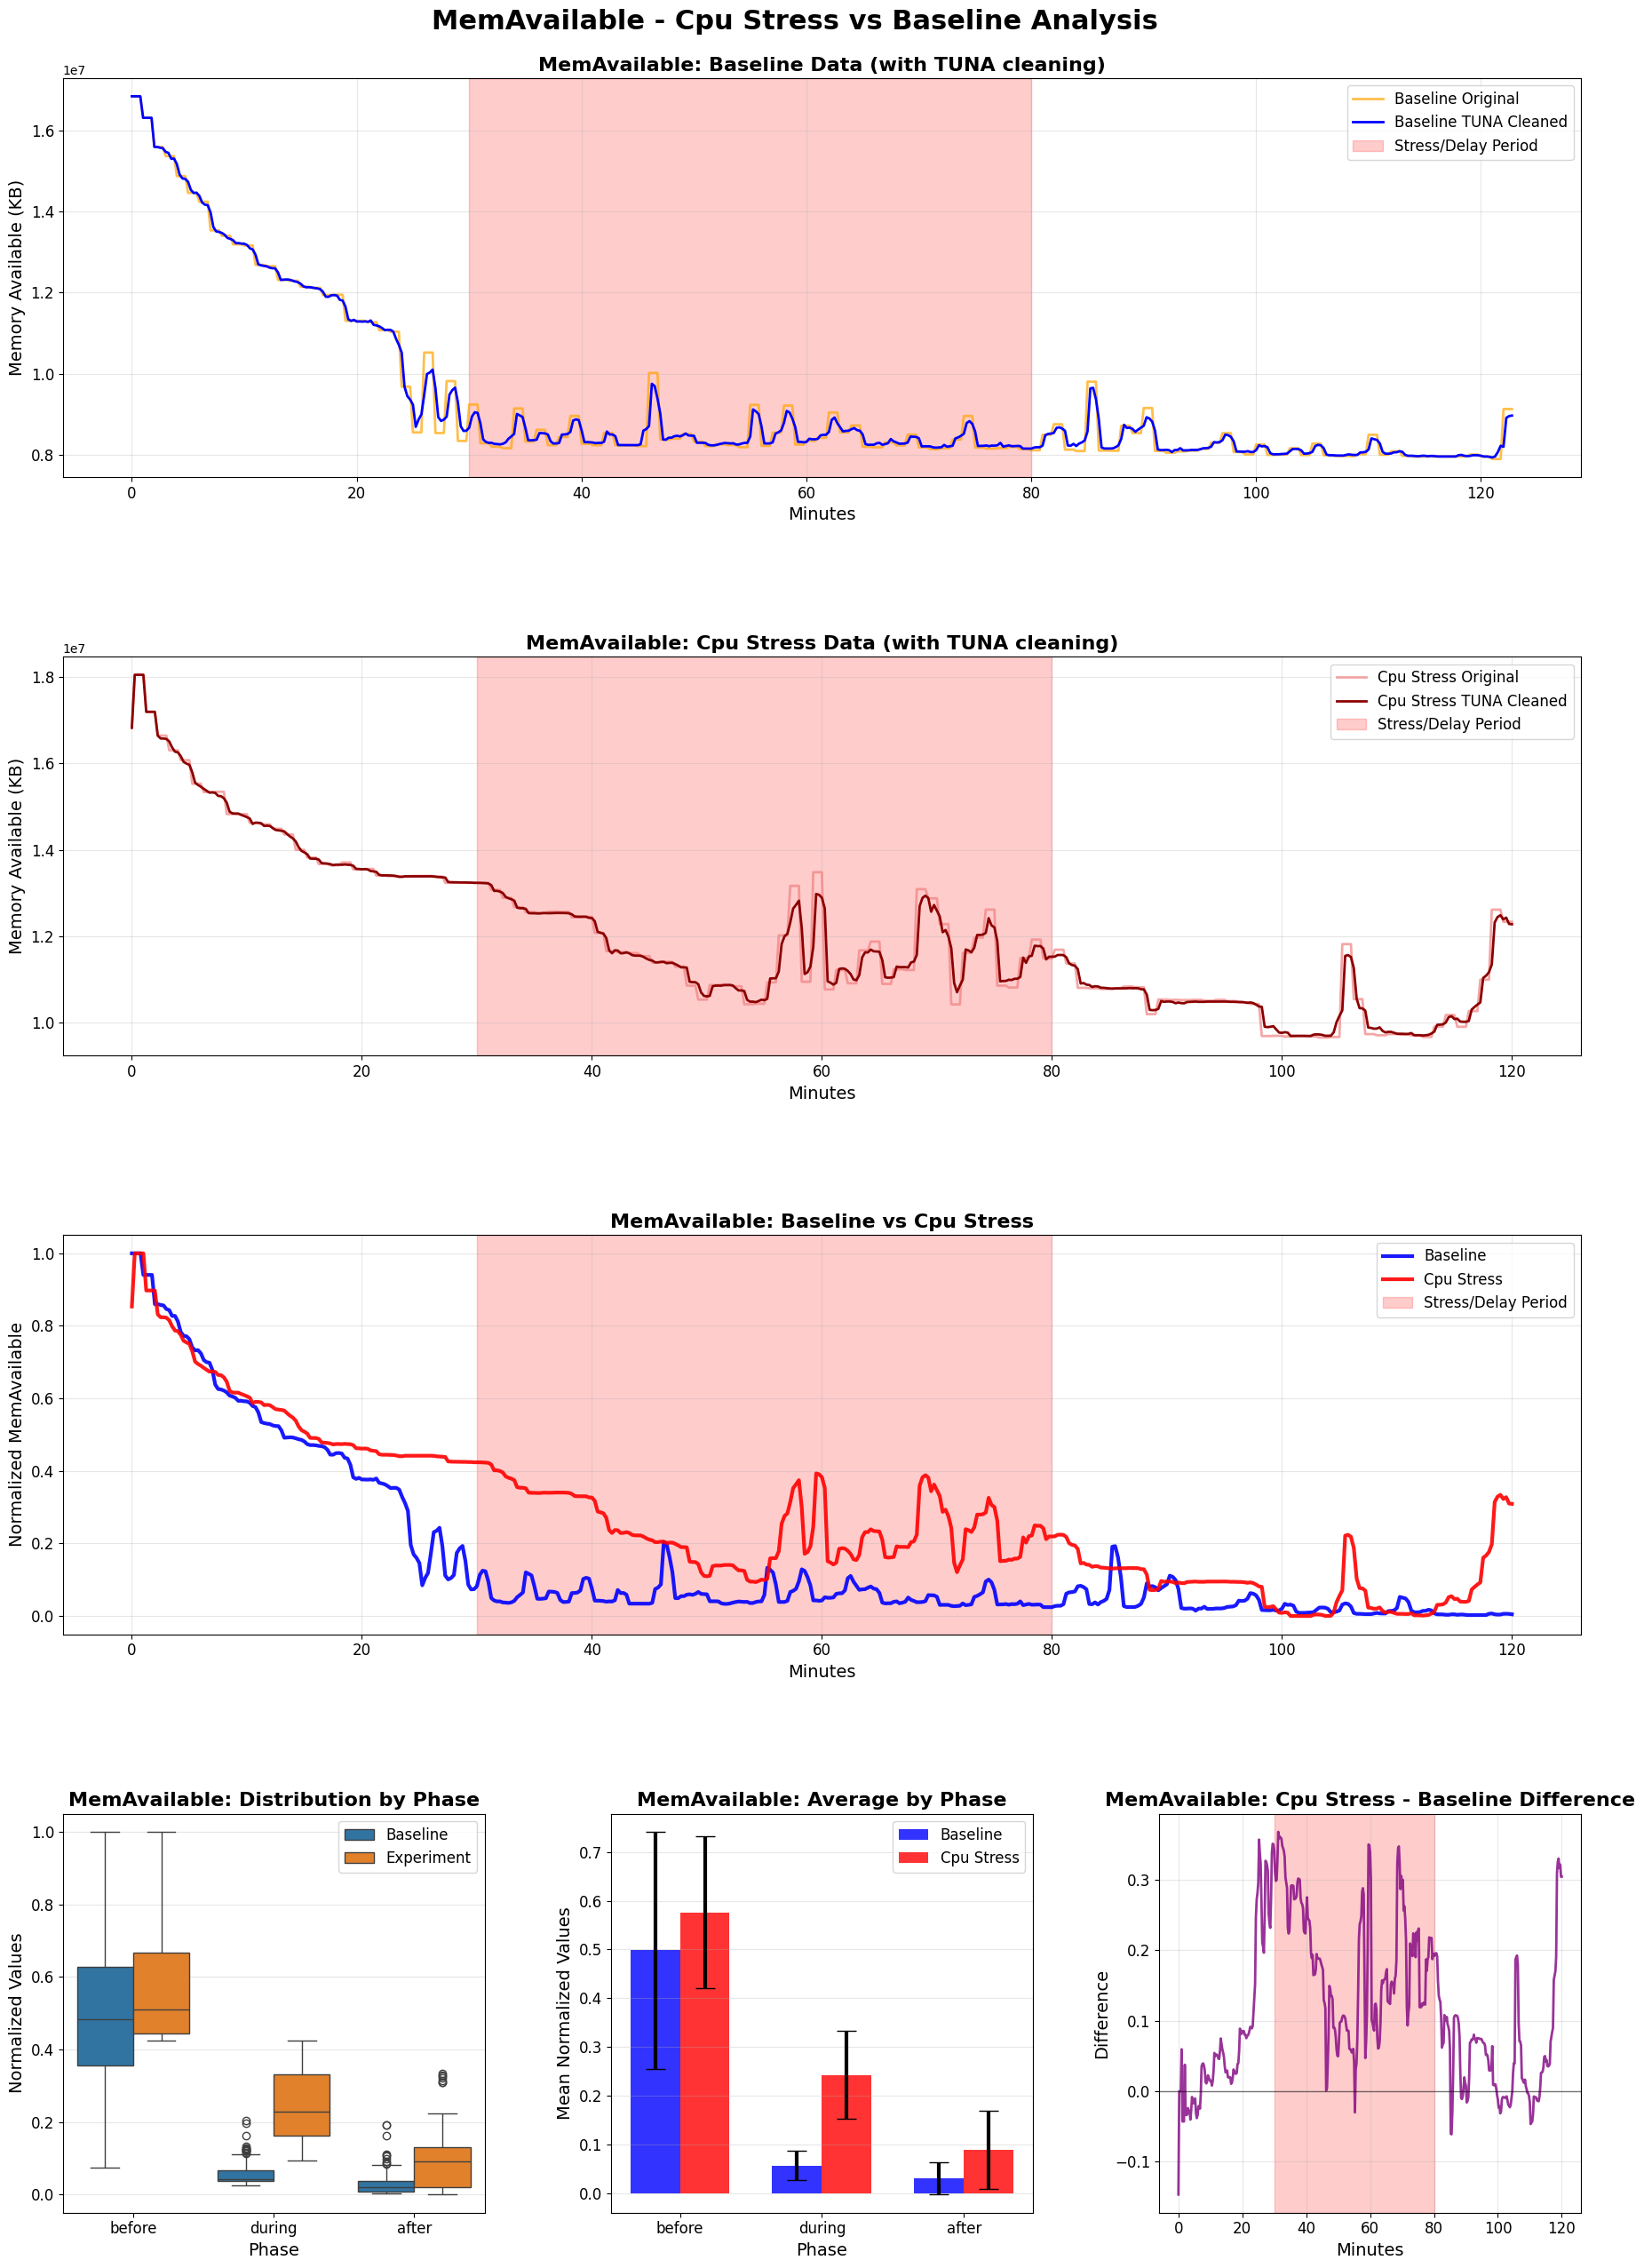


MEMAVAILABLE - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: 1.6%, Correlation: 0.991
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0311  0.0332  0.0026  0.1927
before  0.4982  0.2429  0.0734  1.0000
during  0.0572  0.0304  0.0244  0.2040

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0892  0.0796  0.0000  0.3342
before  0.5758  0.1557  0.4238  1.0000
during  0.2428  0.0898  0.0936  0.4240

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -2.94, p=  0.0036 (SIGNIFICANT)
  DURING  : t=-27.74, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -8.52, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  +15.57% (INCREASE)
  DURING  : +324.44% (INCREASE)
  AFTER   : +186.90% (INCREASE)

MEMORY METRICS DETAILS:
  M

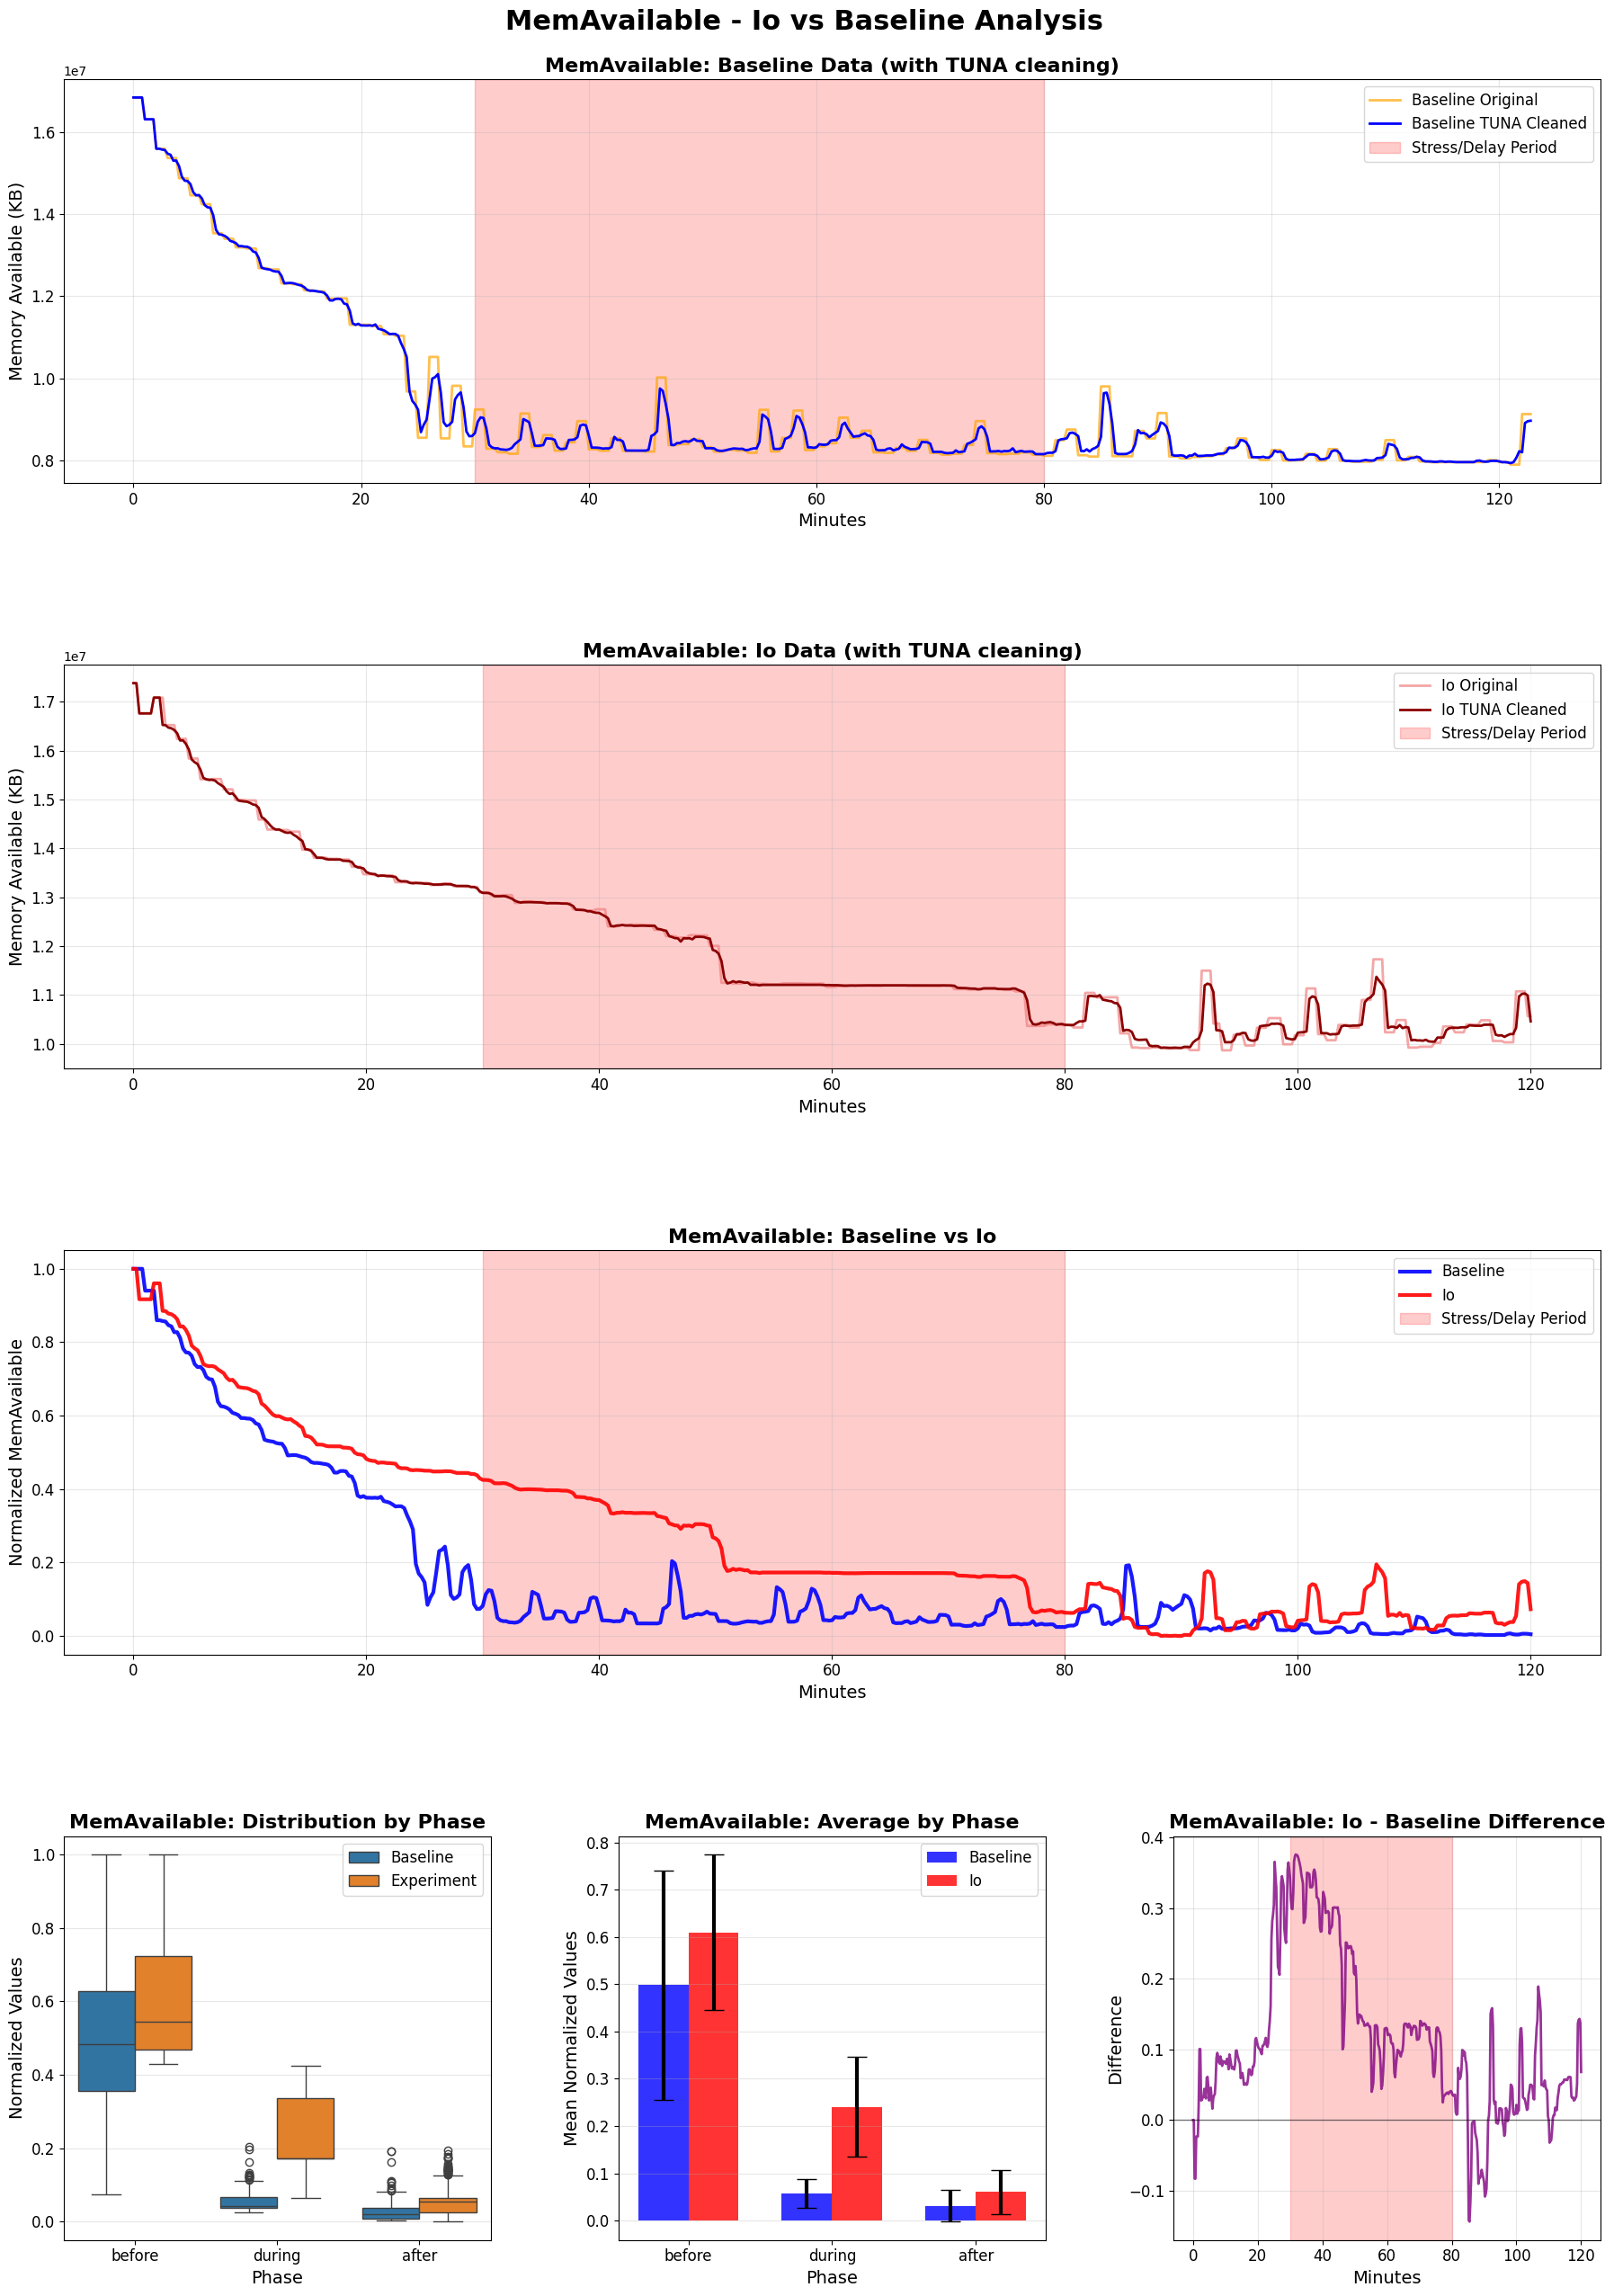


MEMAVAILABLE - IO VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  IO: 0 outliers removed
    Noise Reduction: 1.1%, Correlation: 0.997
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0311  0.0332  0.0026  0.1927
before  0.4982  0.2429  0.0734  1.0000
during  0.0572  0.0304  0.0244  0.2040

IO STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0607  0.0471  0.0000  0.1951
before  0.6100  0.1646  0.4291  1.0000
during  0.2405  0.1053  0.0634  0.4250

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -4.17, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-23.72, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -6.50, p=  0.0000 (SIGNIFICANT)

IO IMPACT:
  BEFORE  :  +22.42% (INCREASE)
  DURING  : +320.48% (INCREASE)
  AFTER   :  +95.19% (INCREASE)

MEMORY METRICS DETAILS:
  Metric: MemAvailable
  Metric typ

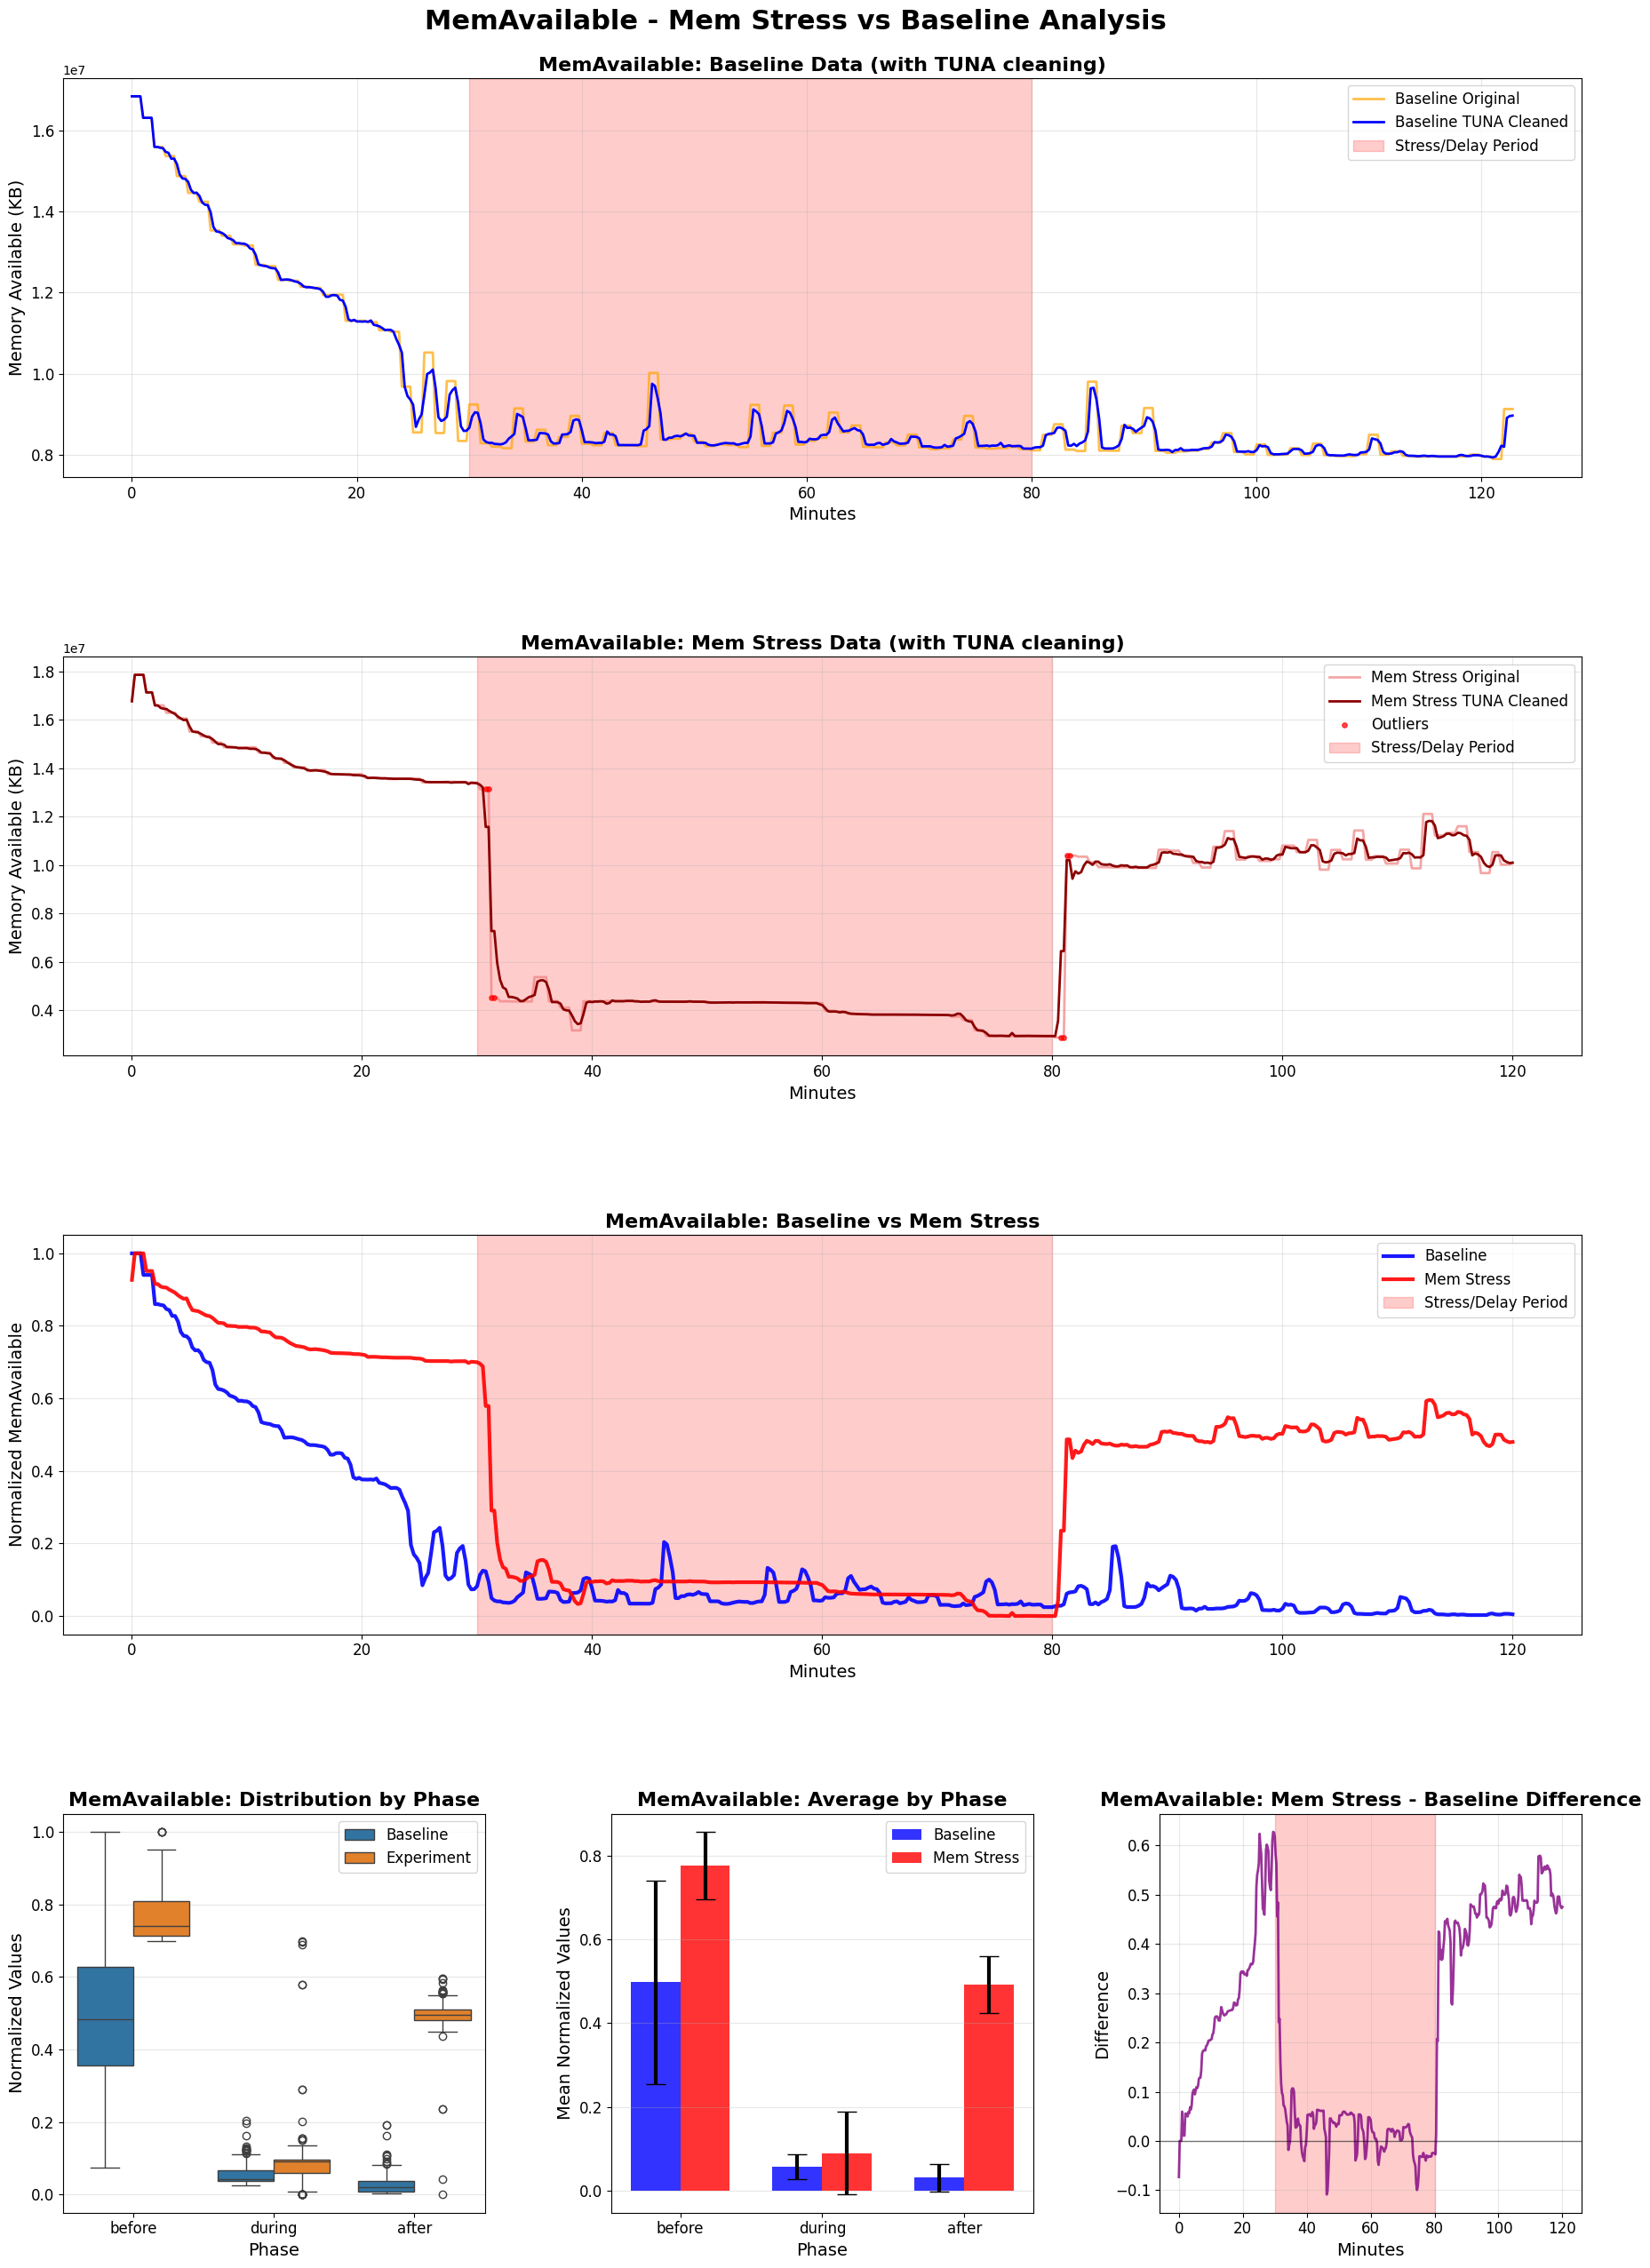


MEMAVAILABLE - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 8 outliers removed
    Noise Reduction: 1.1%, Correlation: 0.996
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0311  0.0332  0.0026  0.1927
before  0.4982  0.2429  0.0734  1.0000
during  0.0572  0.0304  0.0244  0.2040

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.4924  0.0674  0.0000  0.5956
before  0.7770  0.0804  0.6977  1.0000
during  0.0899  0.0992  0.0000  0.6998

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-11.93, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -4.46, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-77.66, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  +55.94% (INCREASE)
  DURING  :  +57.10% (INCREASE)
  AFTER   : +1484.03% (INCREASE)

MEMORY METRICS DETAILS:
  

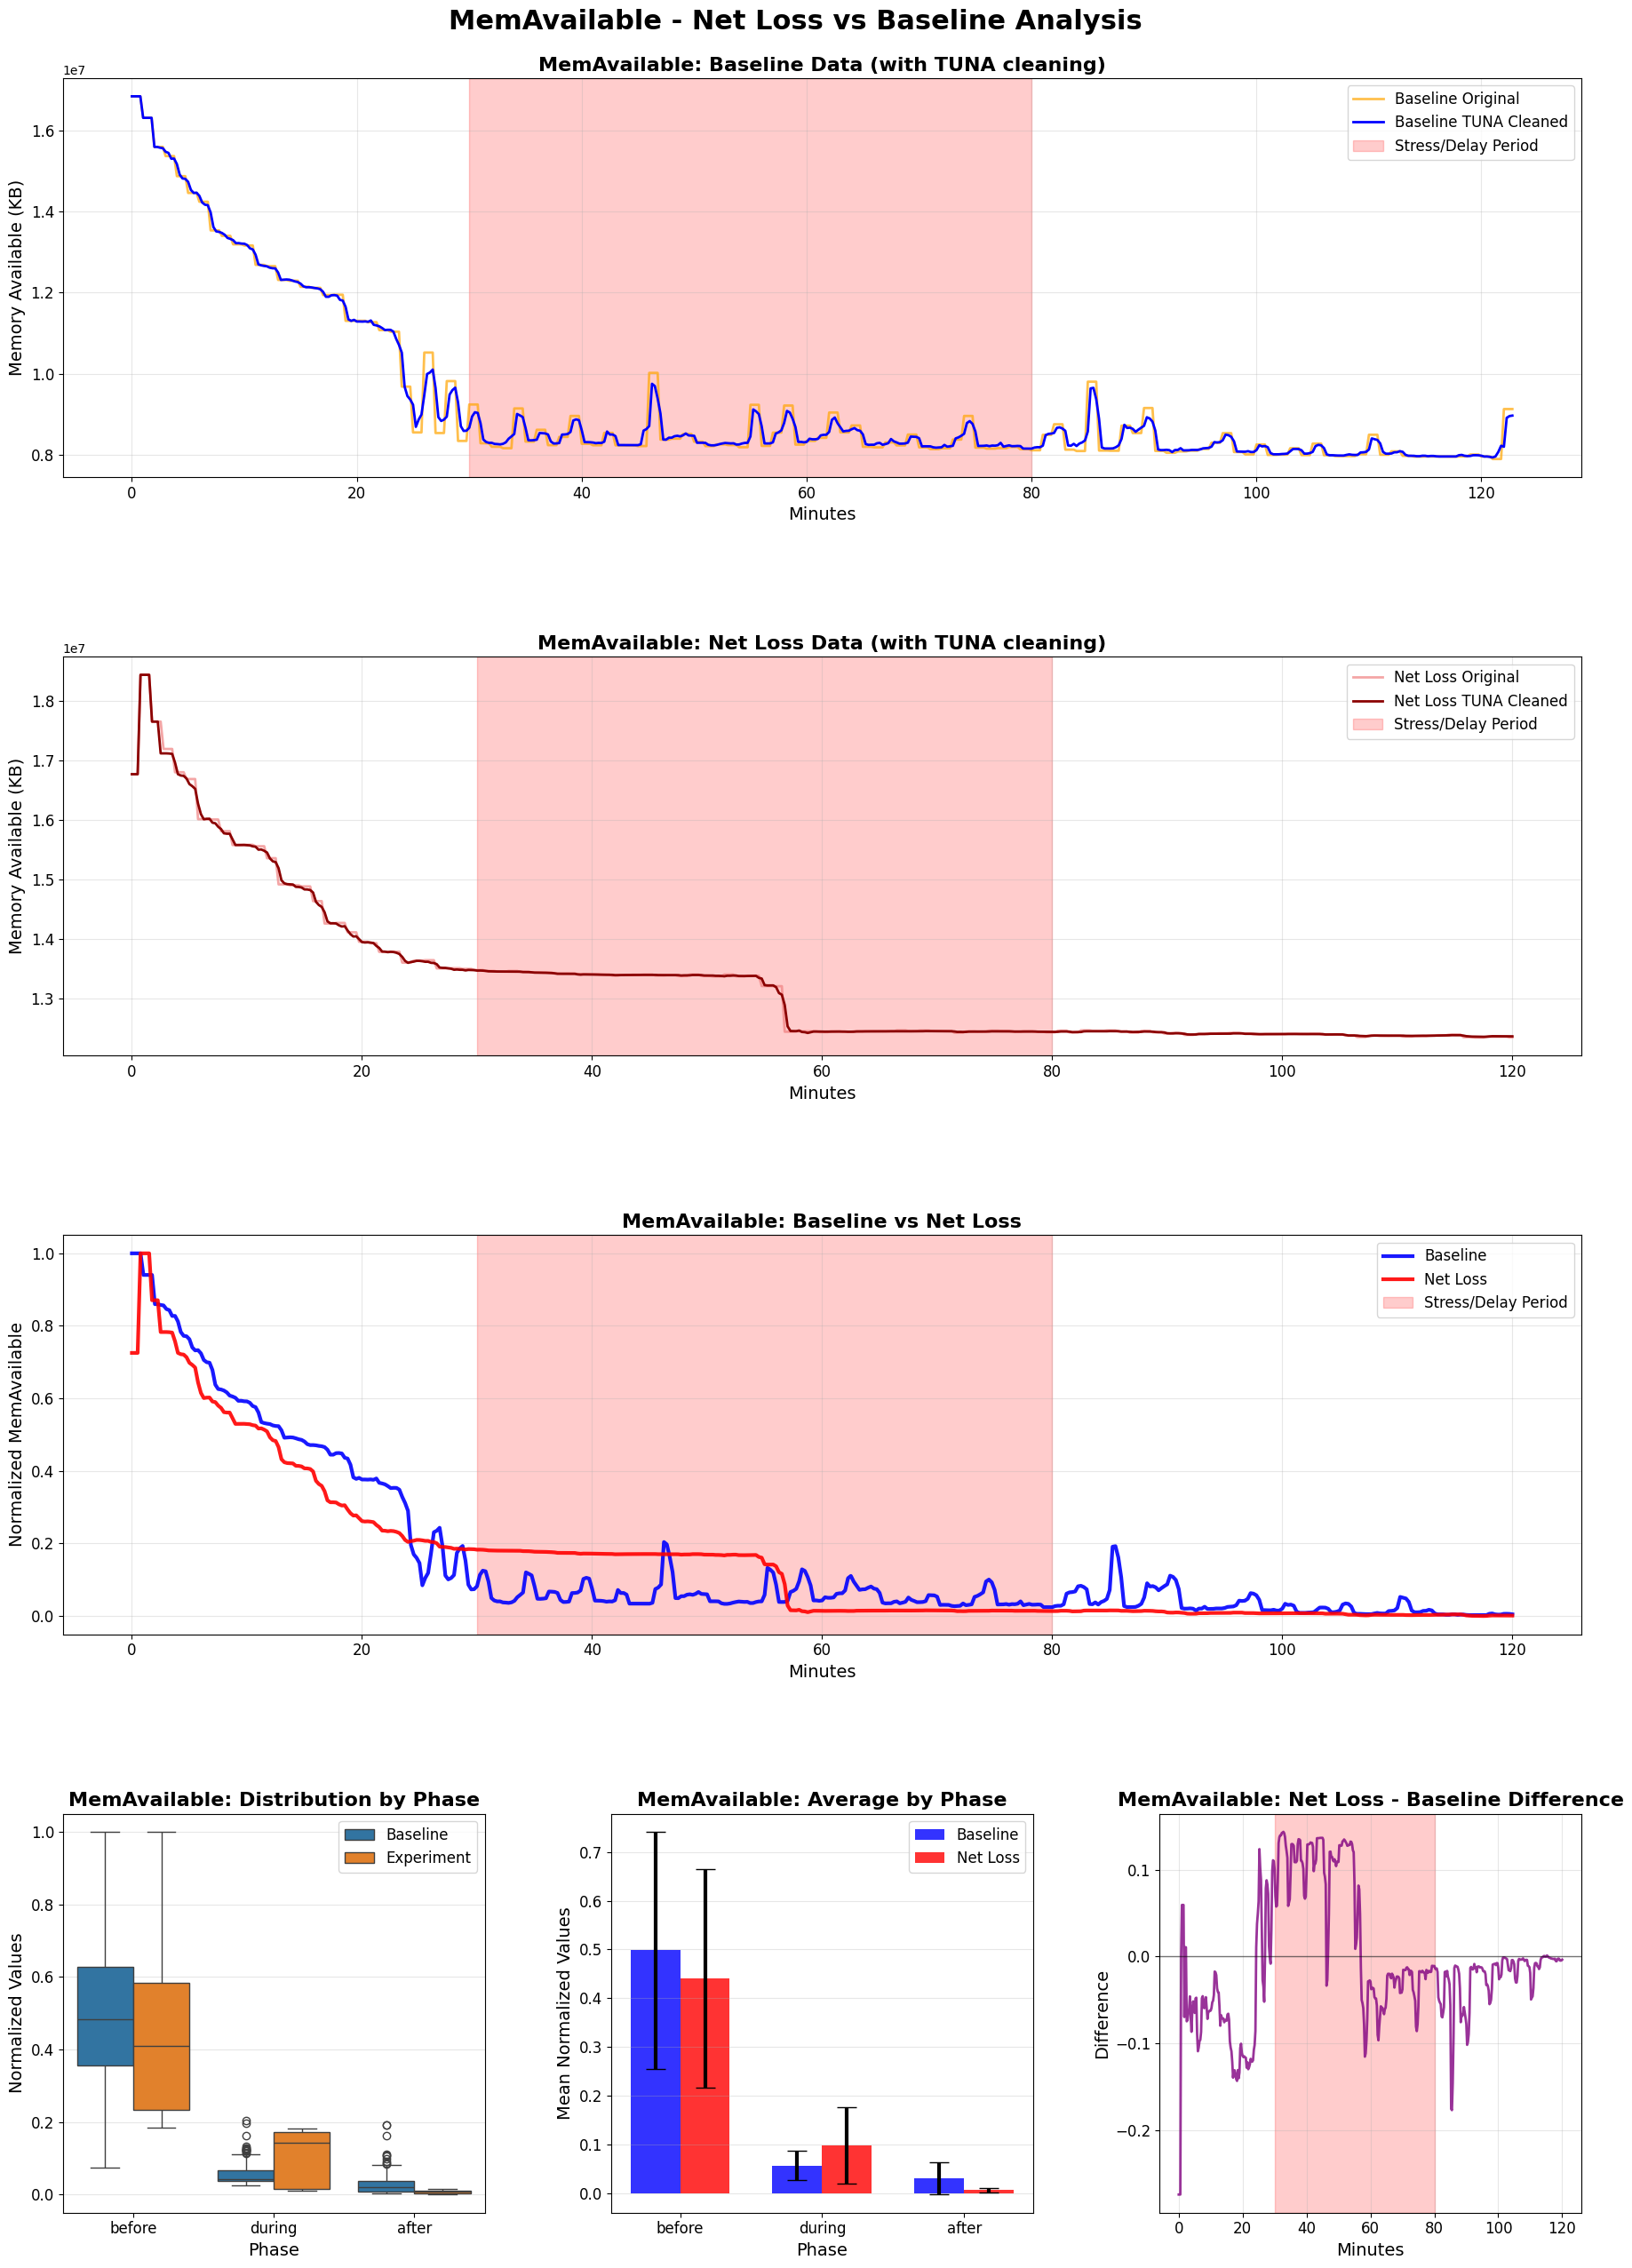


MEMAVAILABLE - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 0.6%, Correlation: 0.999
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0311  0.0332  0.0026  0.1927
before  0.4982  0.2429  0.0734  1.0000
during  0.0572  0.0304  0.0244  0.2040

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0075  0.0046  0.0000  0.0156
before  0.4401  0.2241  0.1834  1.0000
during  0.0980  0.0780  0.0106  0.1830

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  1.93, p=  0.0553 (NOT SIGNIFICANT)
  DURING  : t= -6.90, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  8.91, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  -11.66% (DECREASE)
  DURING  :  +71.27% (INCREASE)
  AFTER   :  -75.92% (DECREASE)

MEMORY METRICS DETAILS:
  Metri

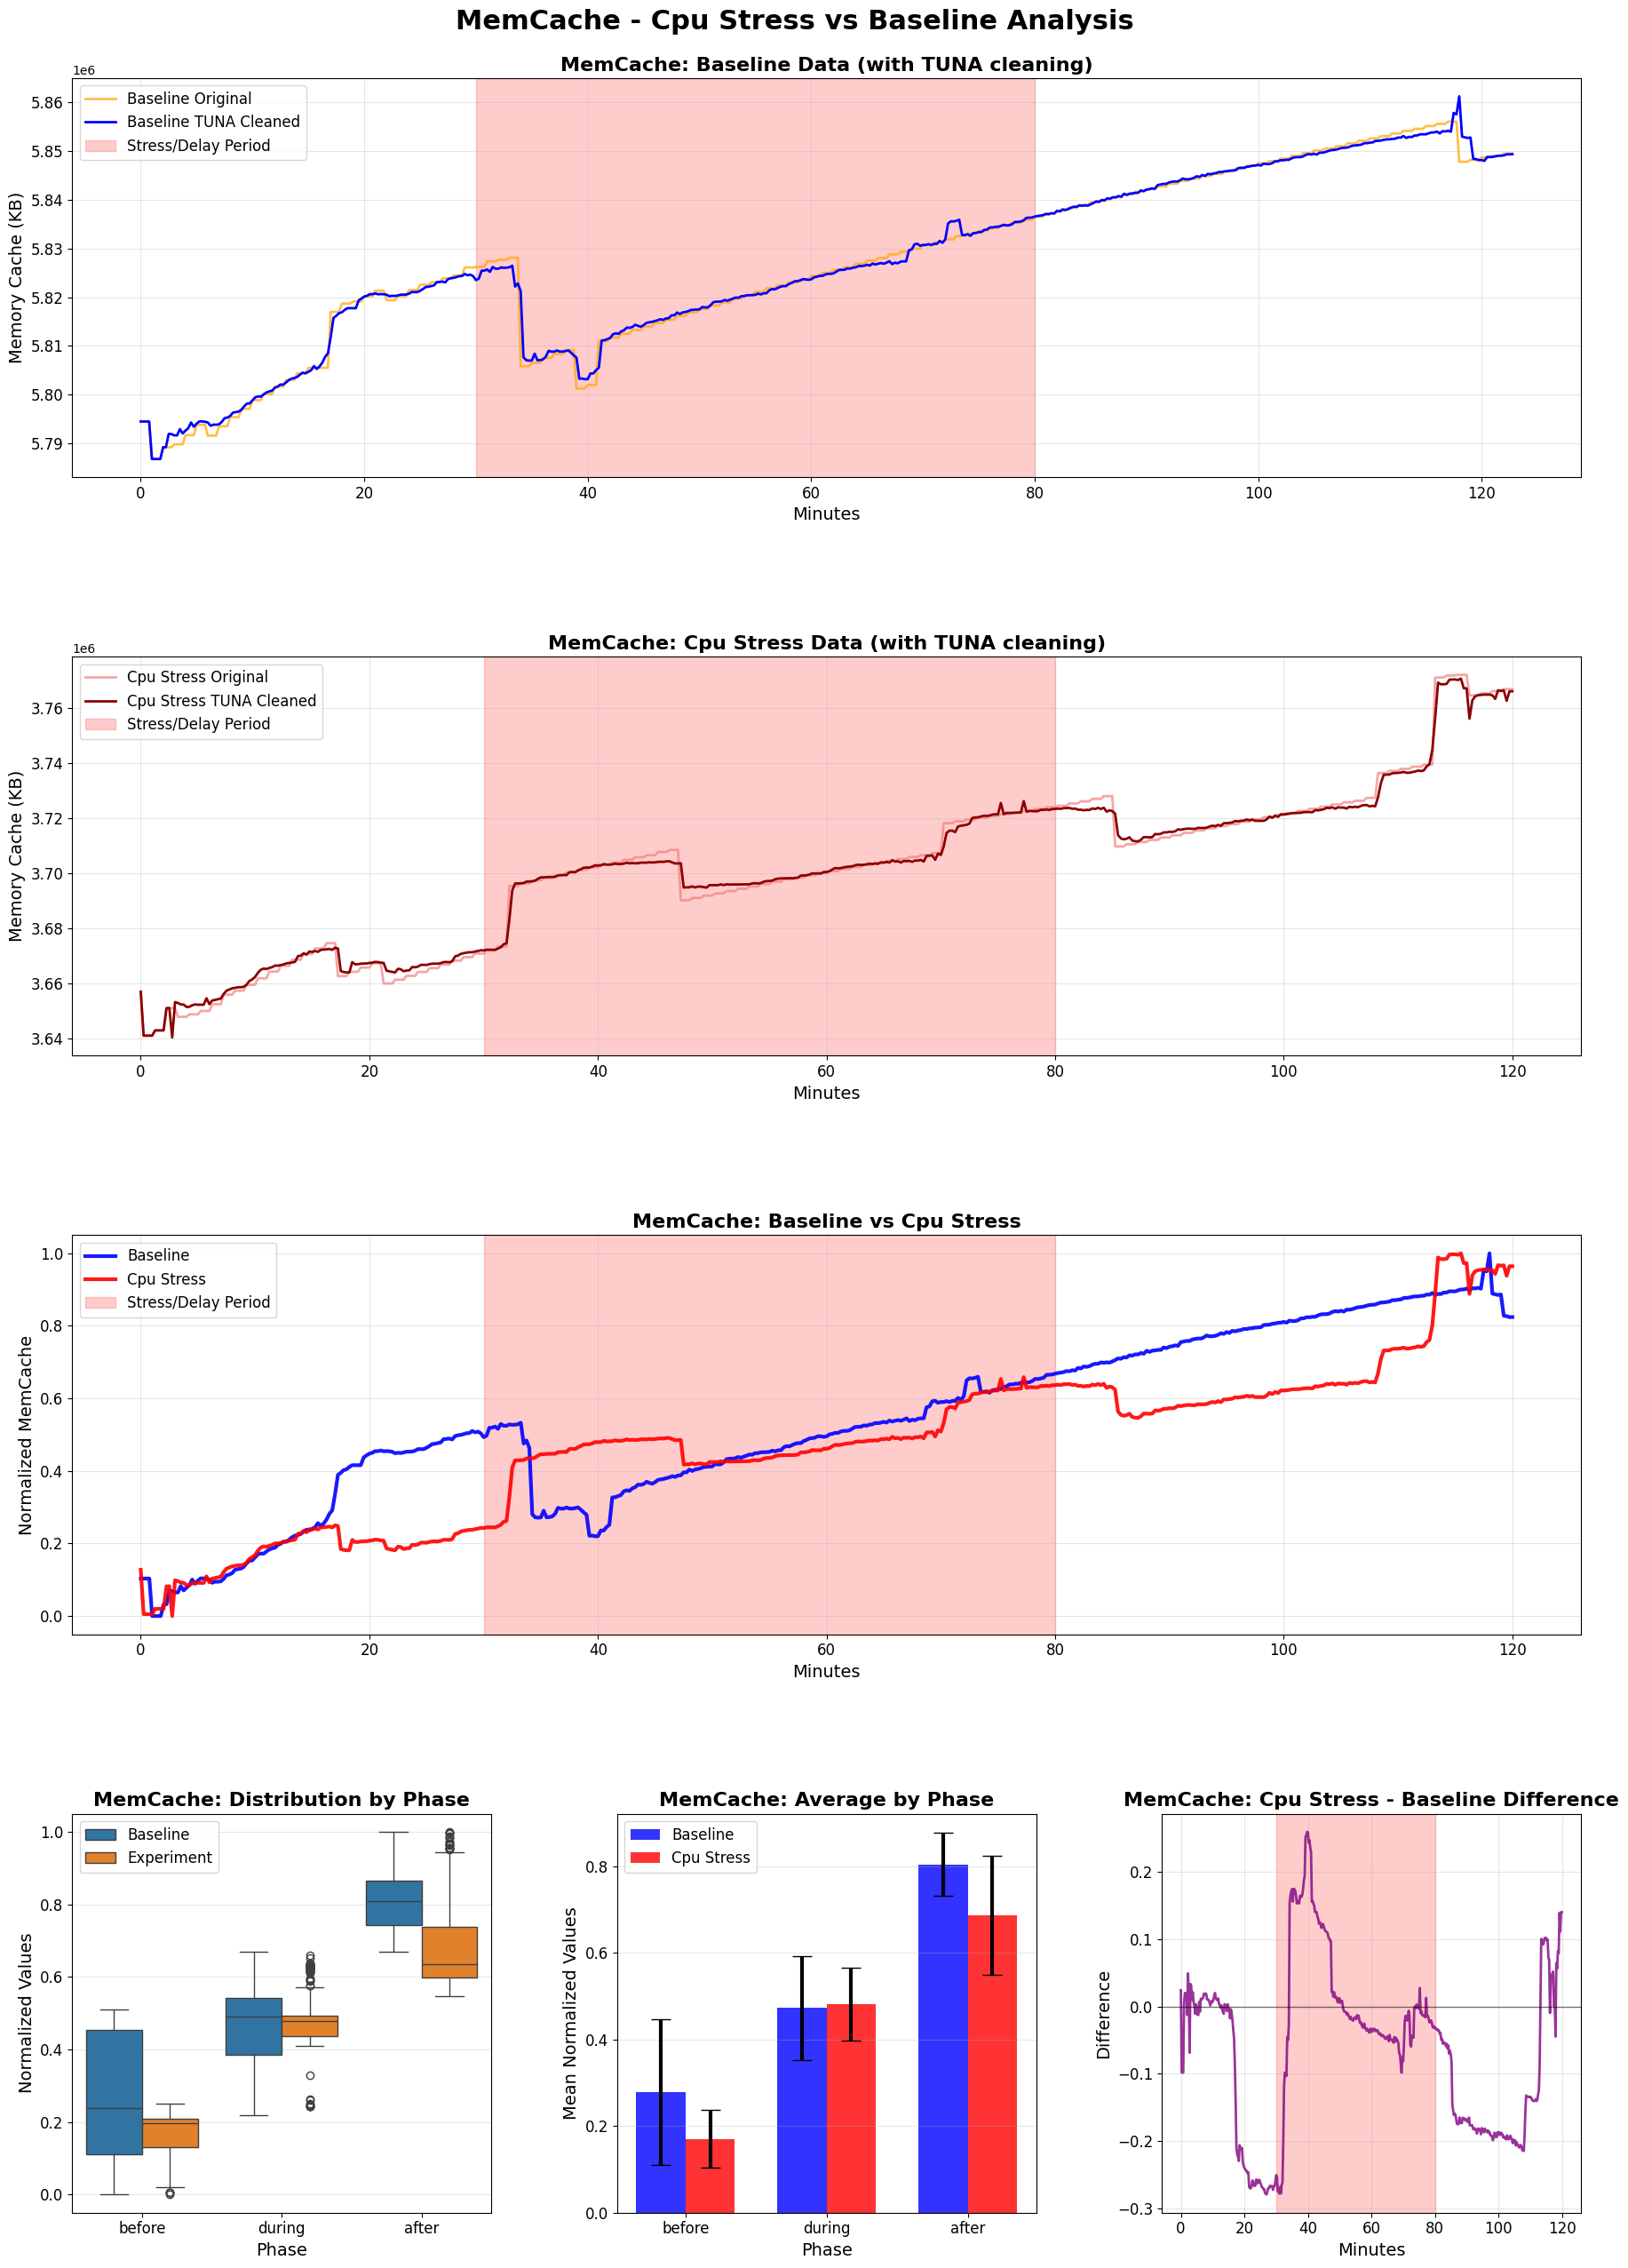


MEMCACHE - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: 3.6%, Correlation: 0.997
  BASELINE: 0 outliers removed
    Noise Reduction: 1.7%, Correlation: 0.997

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8044  0.0729  0.6701  1.0000
before  0.2787  0.1681  0.0000  0.5102
during  0.4722  0.1191  0.2199  0.6682

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6870  0.1377  0.5462  1.0000
before  0.1704  0.0660  0.0000  0.2500
during  0.4820  0.0841  0.2425  0.6586

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  6.57, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -0.95, p=  0.3409 (NOT SIGNIFICANT)
  AFTER   : t=  9.53, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  -38.88% (DECREASE)
  DURING  :   +2.08% (INCREASE)
  AFTER   :  -14.59% (DECREASE)

MEMORY METRICS DETAILS:
  M

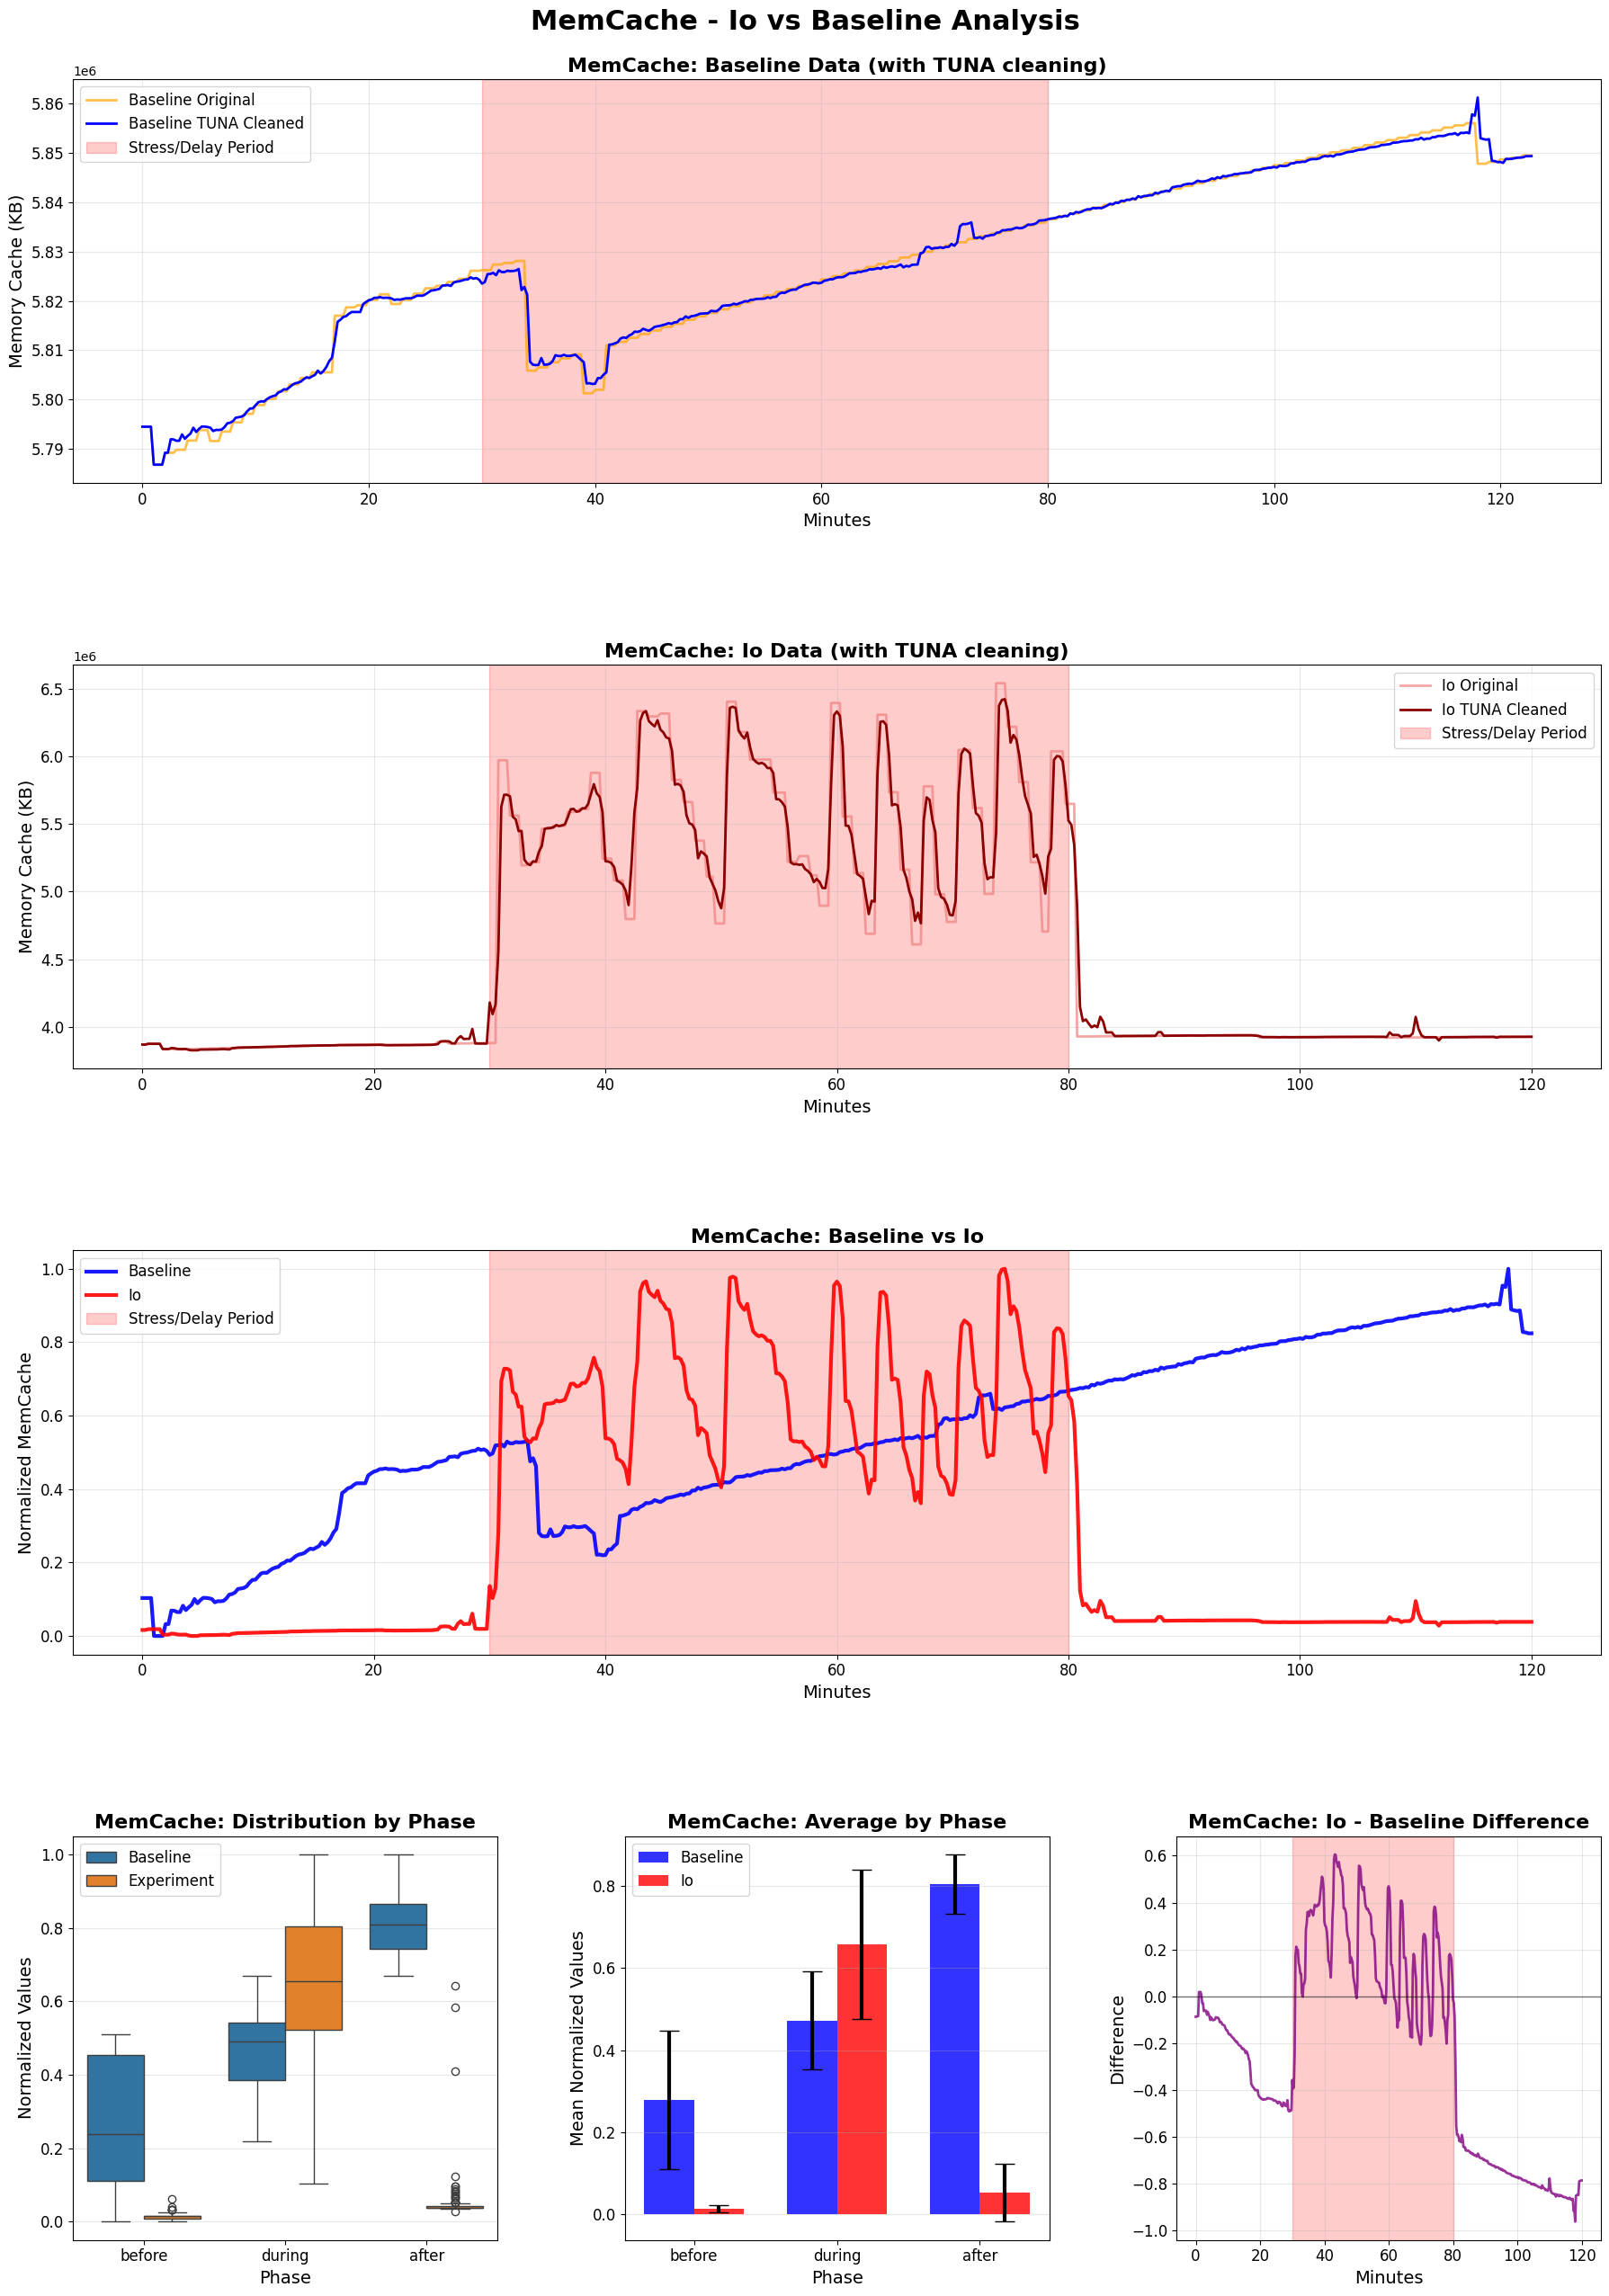


MEMCACHE - IO VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  IO: 0 outliers removed
    Noise Reduction: 3.2%, Correlation: 0.985
  BASELINE: 0 outliers removed
    Noise Reduction: 1.7%, Correlation: 0.997

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8044  0.0729  0.6701  1.0000
before  0.2787  0.1681  0.0000  0.5102
during  0.4722  0.1191  0.2199  0.6682

IO STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0524  0.0707  0.0281  0.6425
before  0.0134  0.0086  0.0000  0.0608
during  0.6574  0.1820  0.1031  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 17.27, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-12.07, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 93.68, p=  0.0000 (SIGNIFICANT)

IO IMPACT:
  BEFORE  :  -95.19% (DECREASE)
  DURING  :  +39.22% (INCREASE)
  AFTER   :  -93.49% (DECREASE)

MEMORY METRICS DETAILS:
  Metric: MemCache
  Metric type: Memor

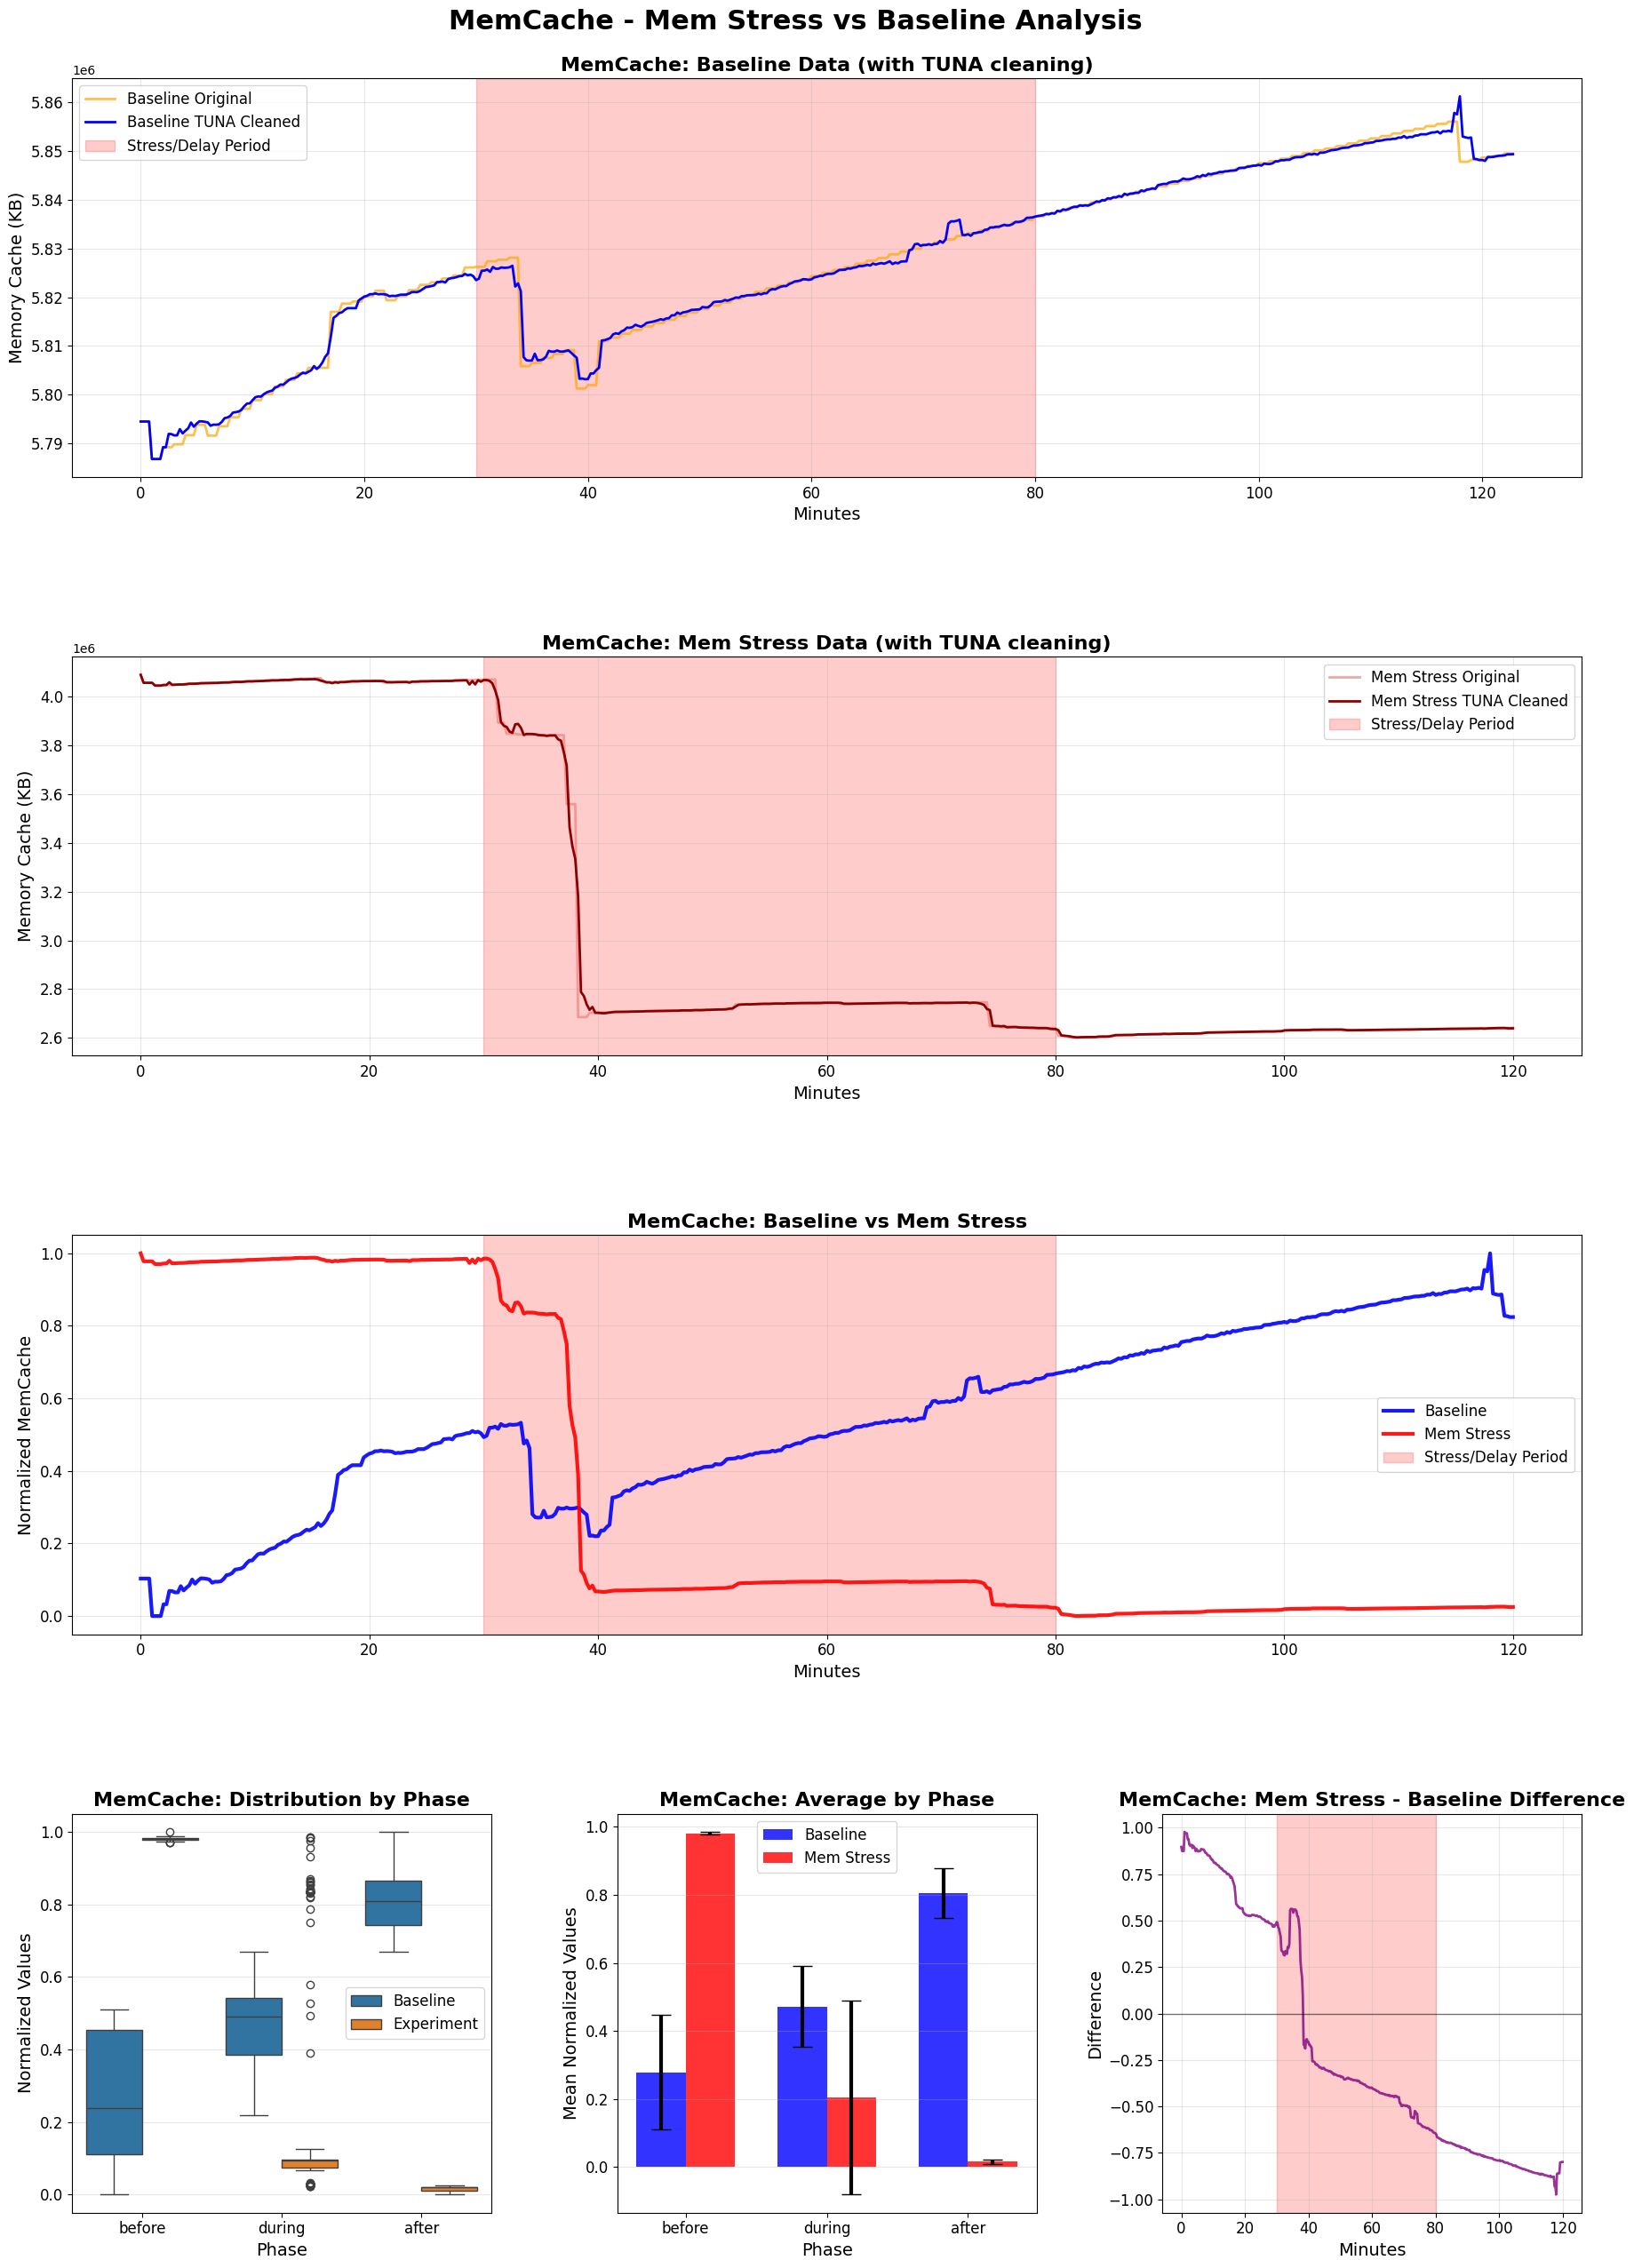


MEMCACHE - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 0 outliers removed
    Noise Reduction: 0.2%, Correlation: 0.999
  BASELINE: 0 outliers removed
    Noise Reduction: 1.7%, Correlation: 0.997

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8044  0.0729  0.6701  1.0000
before  0.2787  0.1681  0.0000  0.5102
during  0.4722  0.1191  0.2199  0.6682

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0159  0.0074  0.0000  0.0258
before  0.9808  0.0045  0.9703  1.0000
during  0.2038  0.2843  0.0229  0.9856

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=-45.74, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 12.35, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=136.19, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  : +251.89% (INCREASE)
  DURING  :  -56.85% (DECREASE)
  AFTER   :  -98.03% (DECREASE)

MEMORY METRICS DETAILS:
  Metri

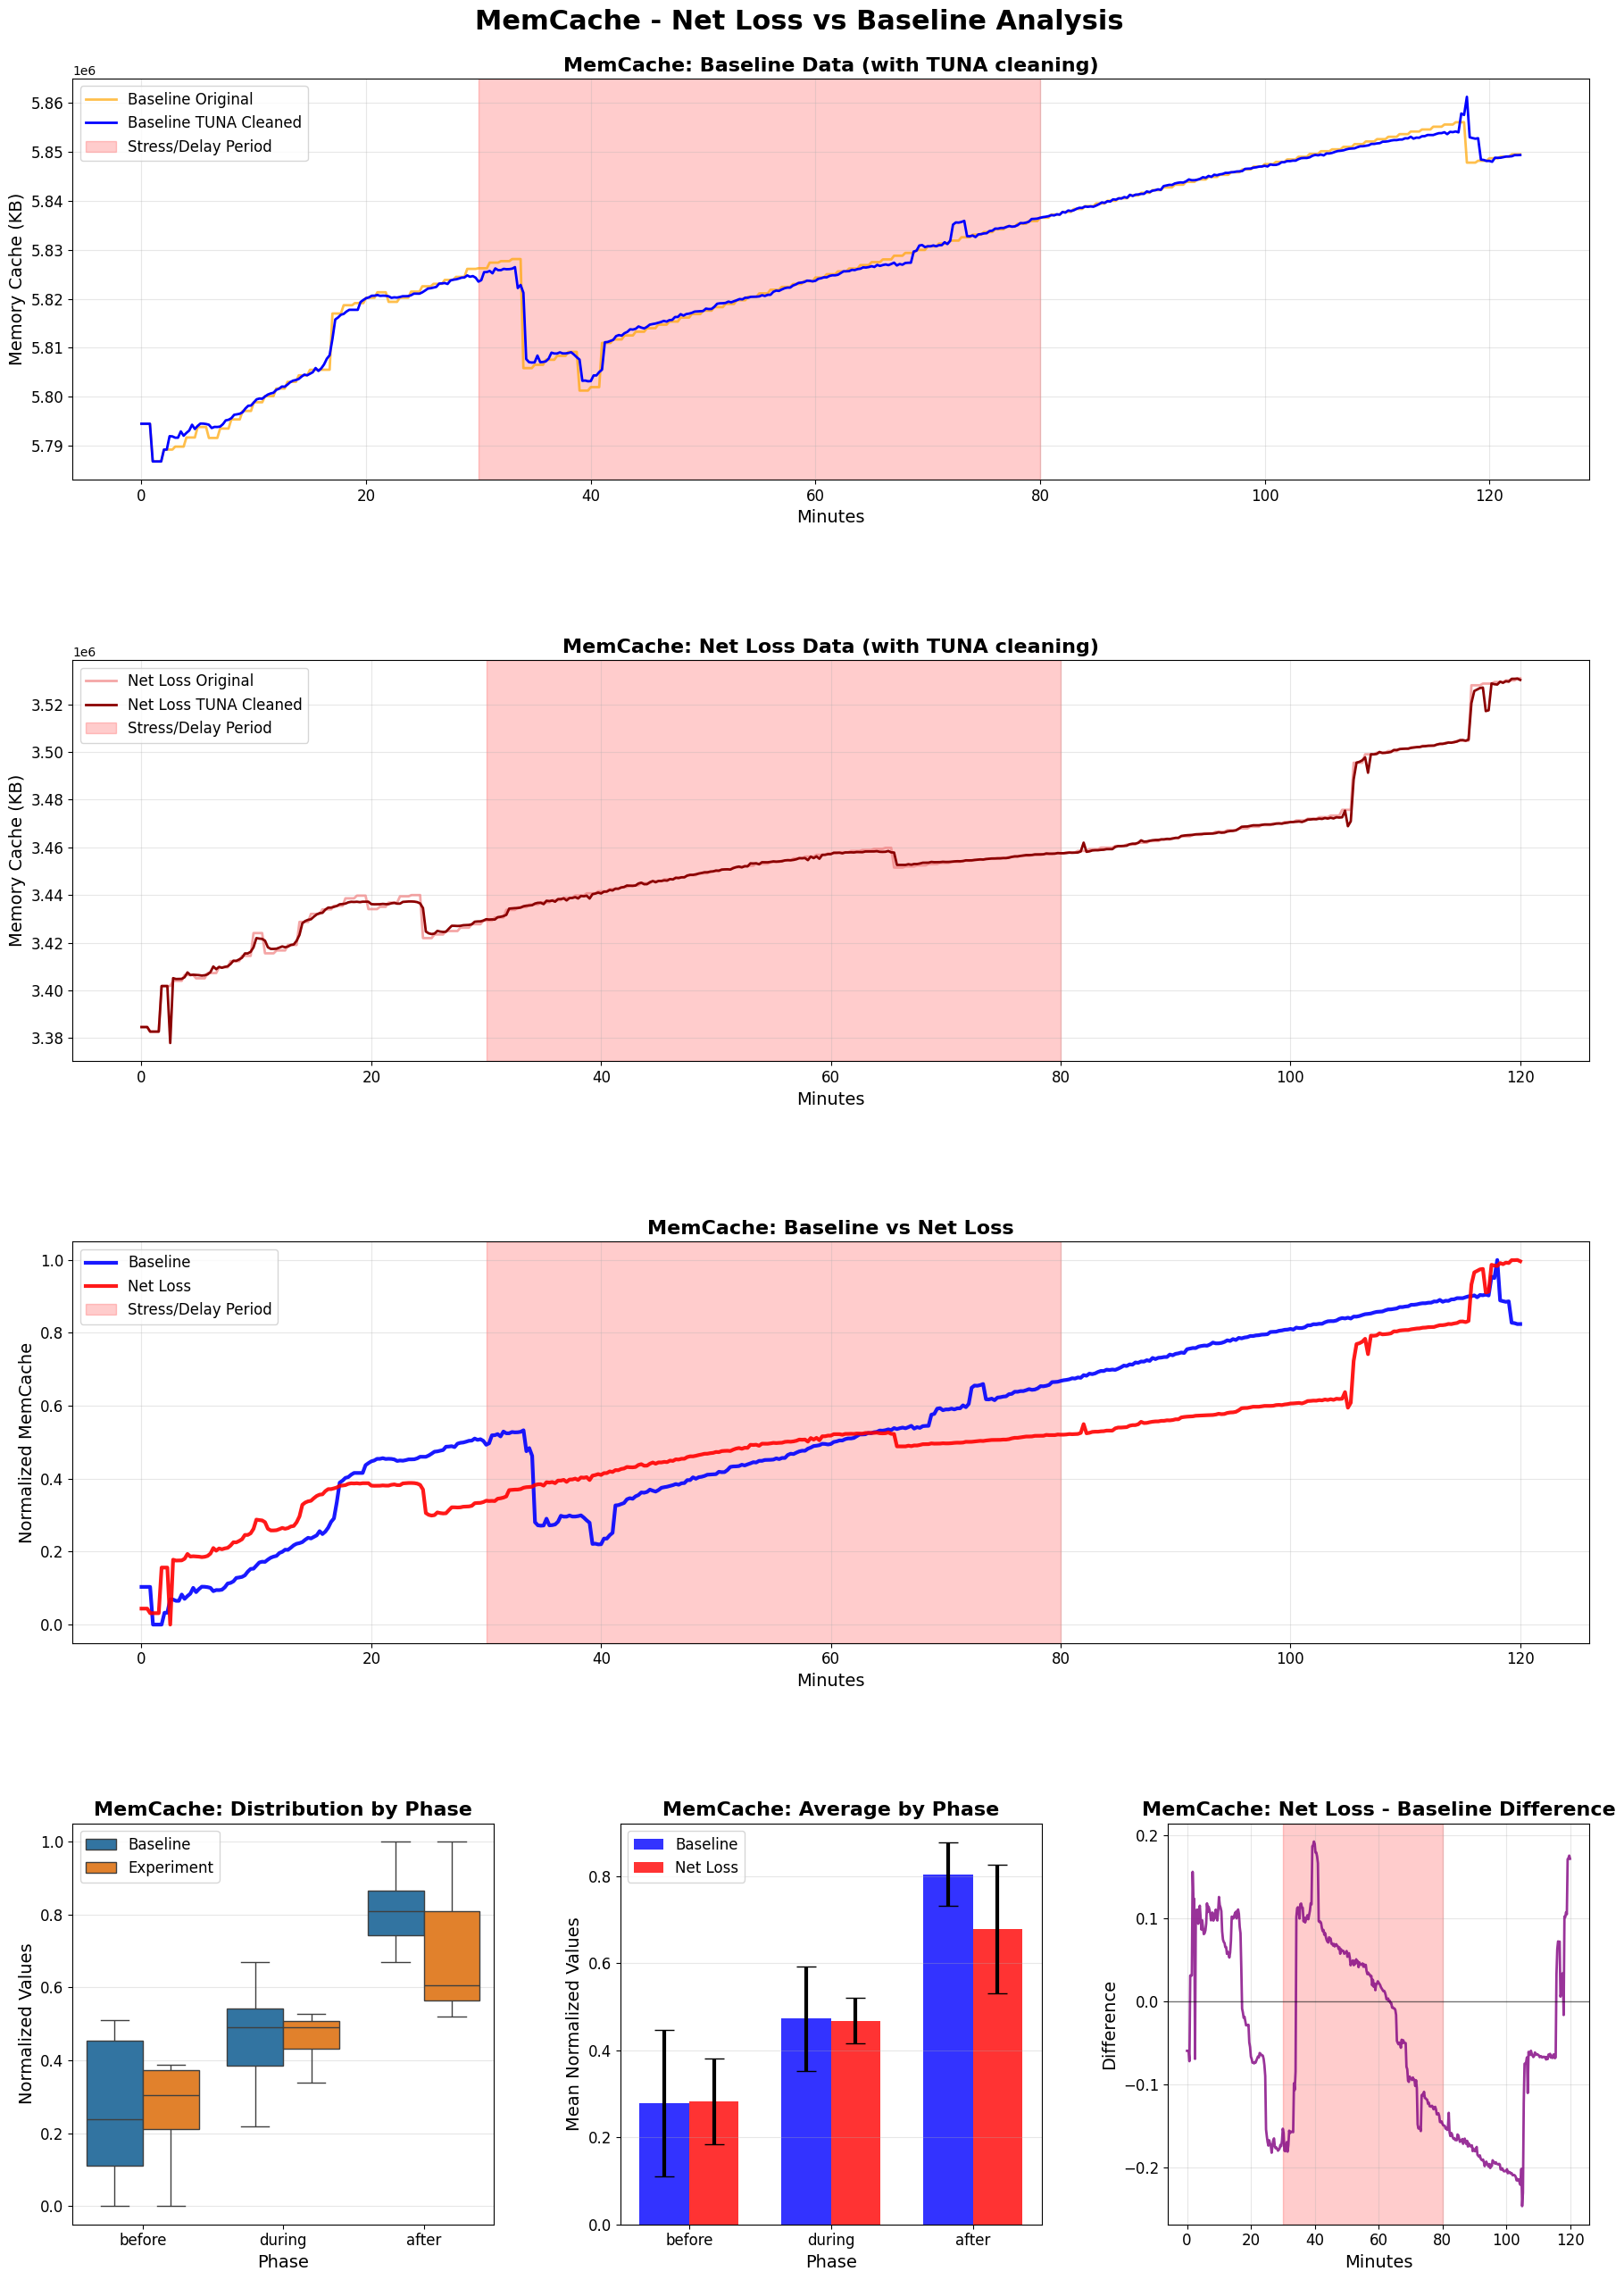


MEMCACHE - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 1.0%, Correlation: 0.998
  BASELINE: 0 outliers removed
    Noise Reduction: 1.7%, Correlation: 0.997

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.8044  0.0729  0.6701  1.0000
before  0.2787  0.1681  0.0000  0.5102
during  0.4722  0.1191  0.2199  0.6682

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6783  0.1479  0.5208  1.0000
before  0.2820  0.0985  0.0000  0.3884
during  0.4679  0.0526  0.3388  0.5269

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -0.18, p=  0.8557 (NOT SIGNIFICANT)
  DURING  : t=  0.47, p=  0.6389 (NOT SIGNIFICANT)
  AFTER   : t=  9.67, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :   +1.16% (INCREASE)
  DURING  :   -0.91% (DECREASE)
  AFTER   :  -15.67% (DECREASE)

MEMORY METRICS DETAILS:
  Metri

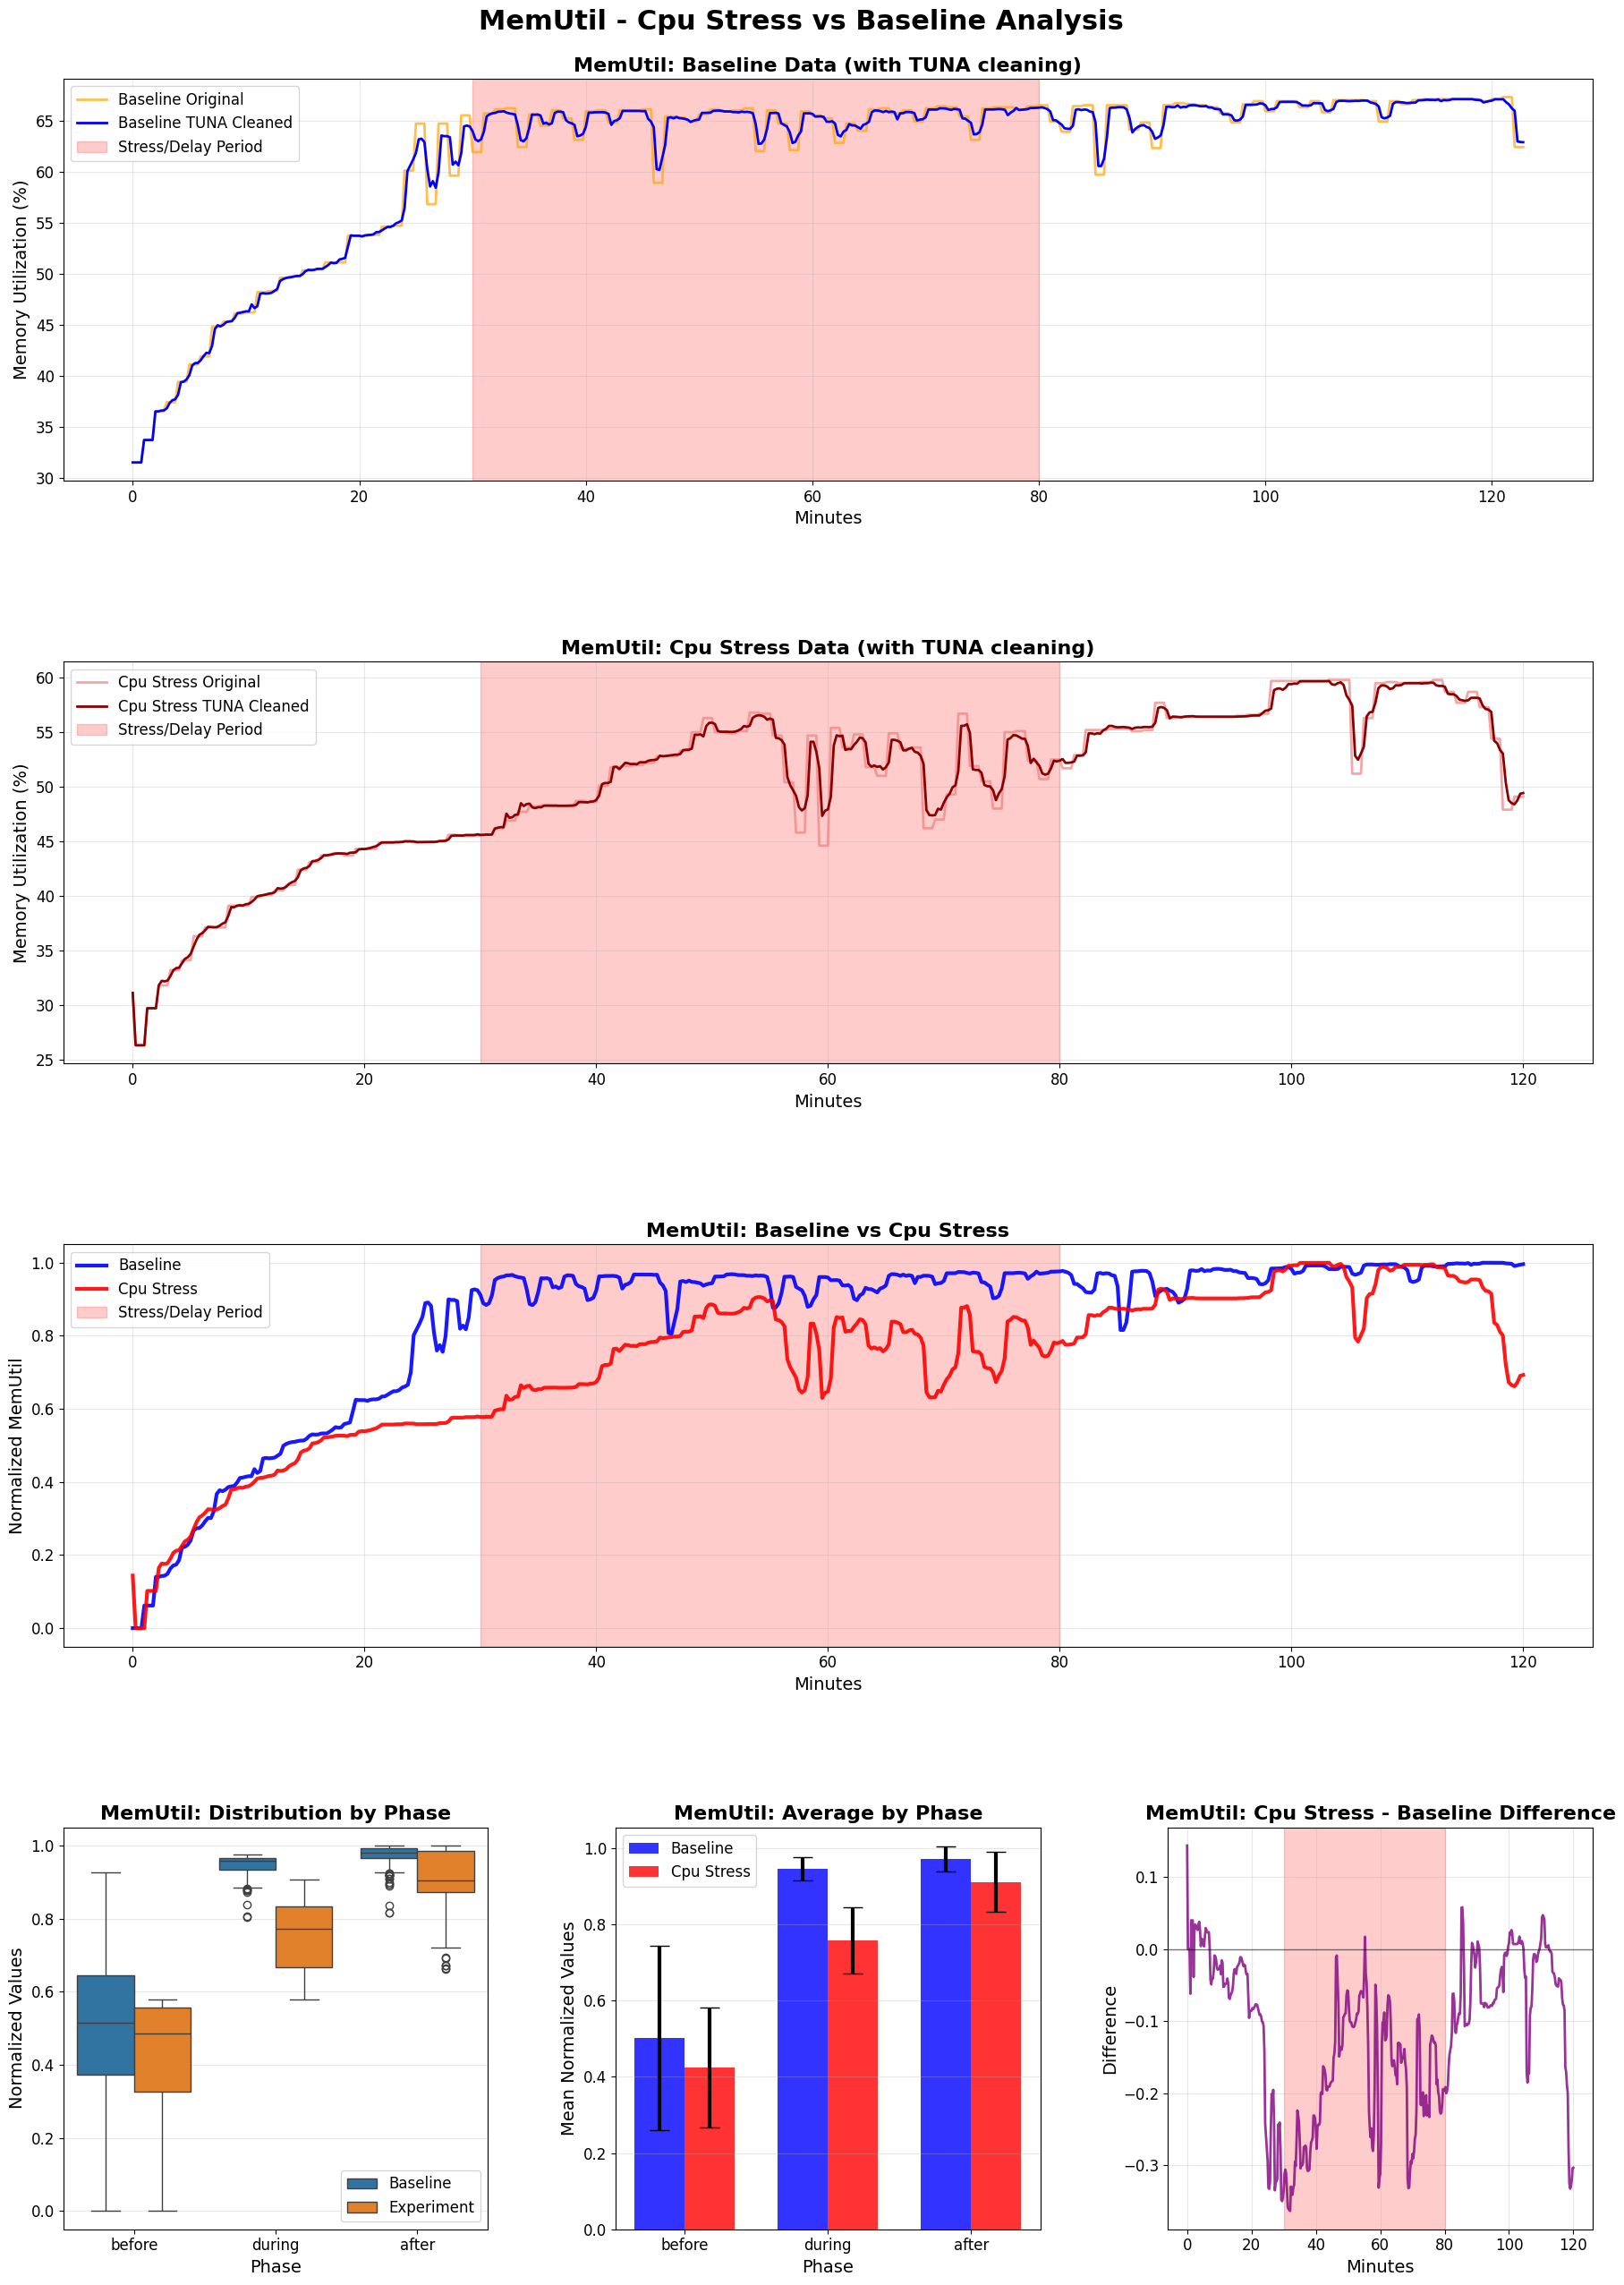


MEMUTIL - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: 1.8%, Correlation: 0.990
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9709  0.0331  0.8159  1.0000
before  0.5020  0.2421  0.0000  0.9272
during  0.9457  0.0298  0.8052  0.9763

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9107  0.0787  0.6618  1.0000
before  0.4241  0.1564  0.0000  0.5793
during  0.7578  0.0877  0.5777  0.9063

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  2.96, p=  0.0034 (SIGNIFICANT)
  DURING  : t= 28.75, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  8.92, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  -15.52% (DECREASE)
  DURING  :  -19.87% (DECREASE)
  AFTER   :   -6.20% (DECREASE)

MEMORY METRICS DETAILS:
  Metric

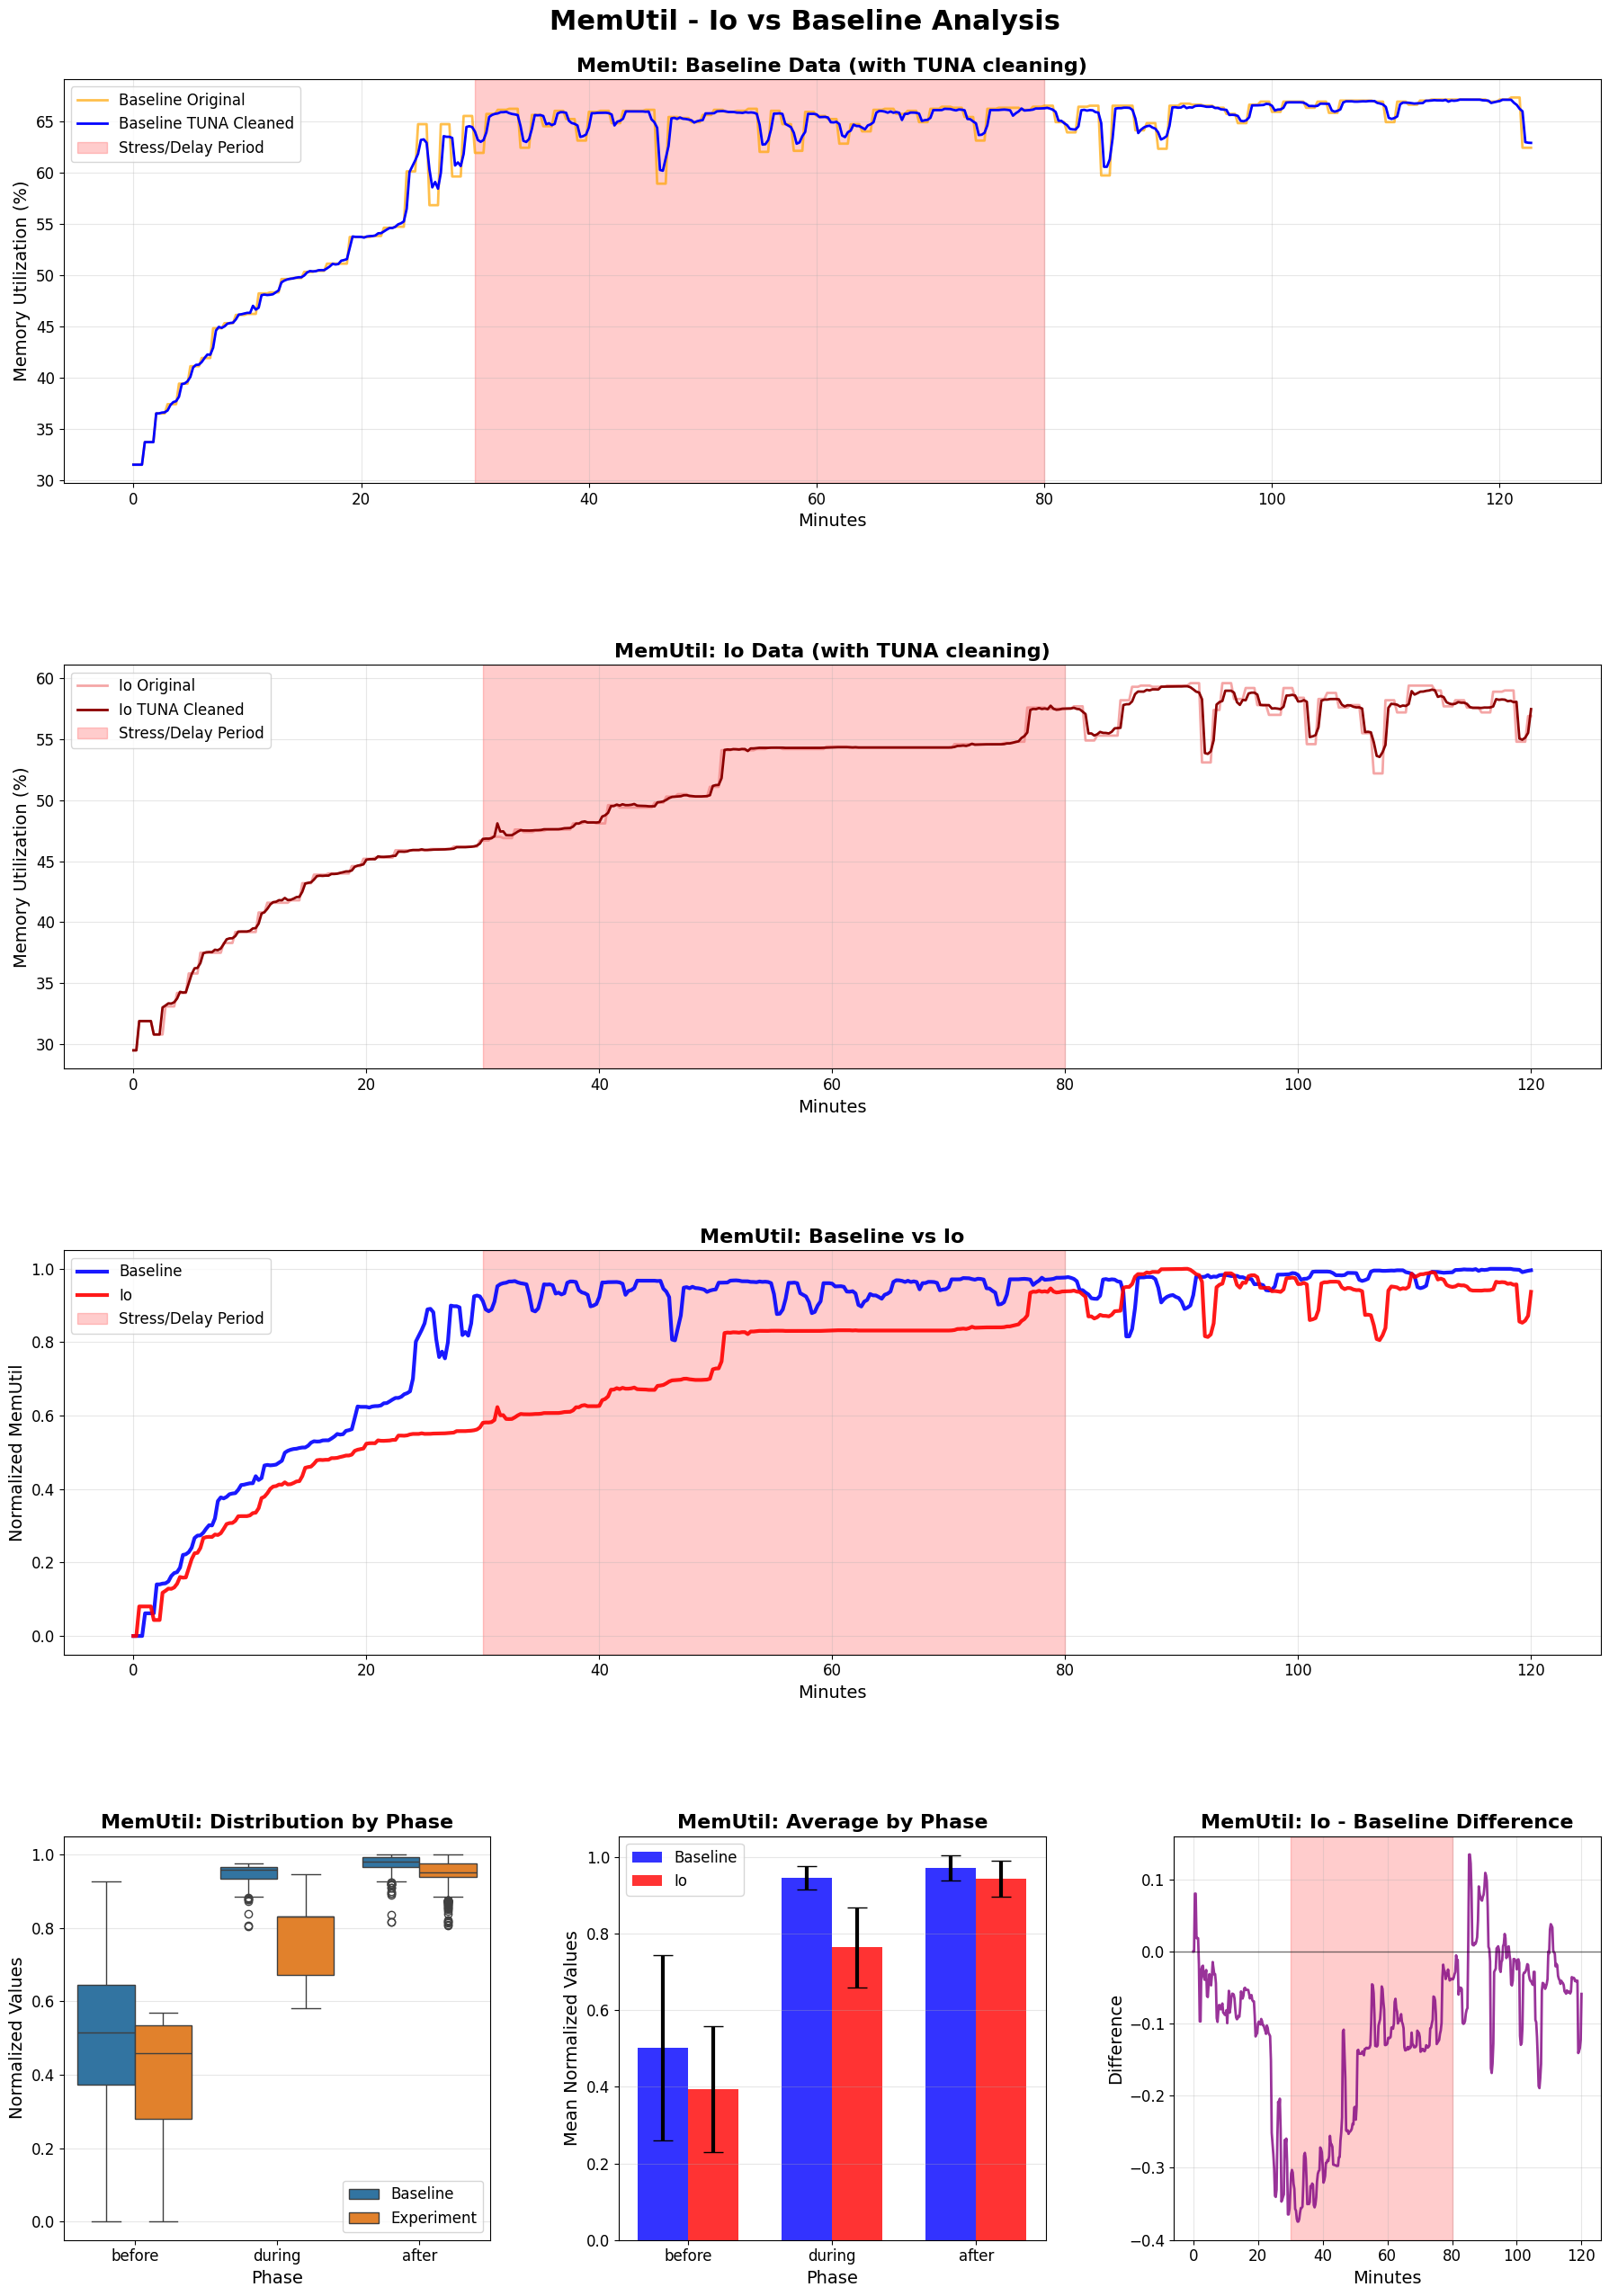


MEMUTIL - IO VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  IO: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.997
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9709  0.0331  0.8159  1.0000
before  0.5020  0.2421  0.0000  0.9272
during  0.9457  0.0298  0.8052  0.9763

IO STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9425  0.0473  0.8059  1.0000
before  0.3928  0.1644  0.0000  0.5679
during  0.7635  0.1050  0.5806  0.9465

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  4.09, p=  0.0001 (SIGNIFICANT)
  DURING  : t= 23.65, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  6.24, p=  0.0000 (SIGNIFICANT)

IO IMPACT:
  BEFORE  :  -21.76% (DECREASE)
  DURING  :  -19.26% (DECREASE)
  AFTER   :   -2.93% (DECREASE)

MEMORY METRICS DETAILS:
  Metric: MemUtil
  Metric type: Memory 

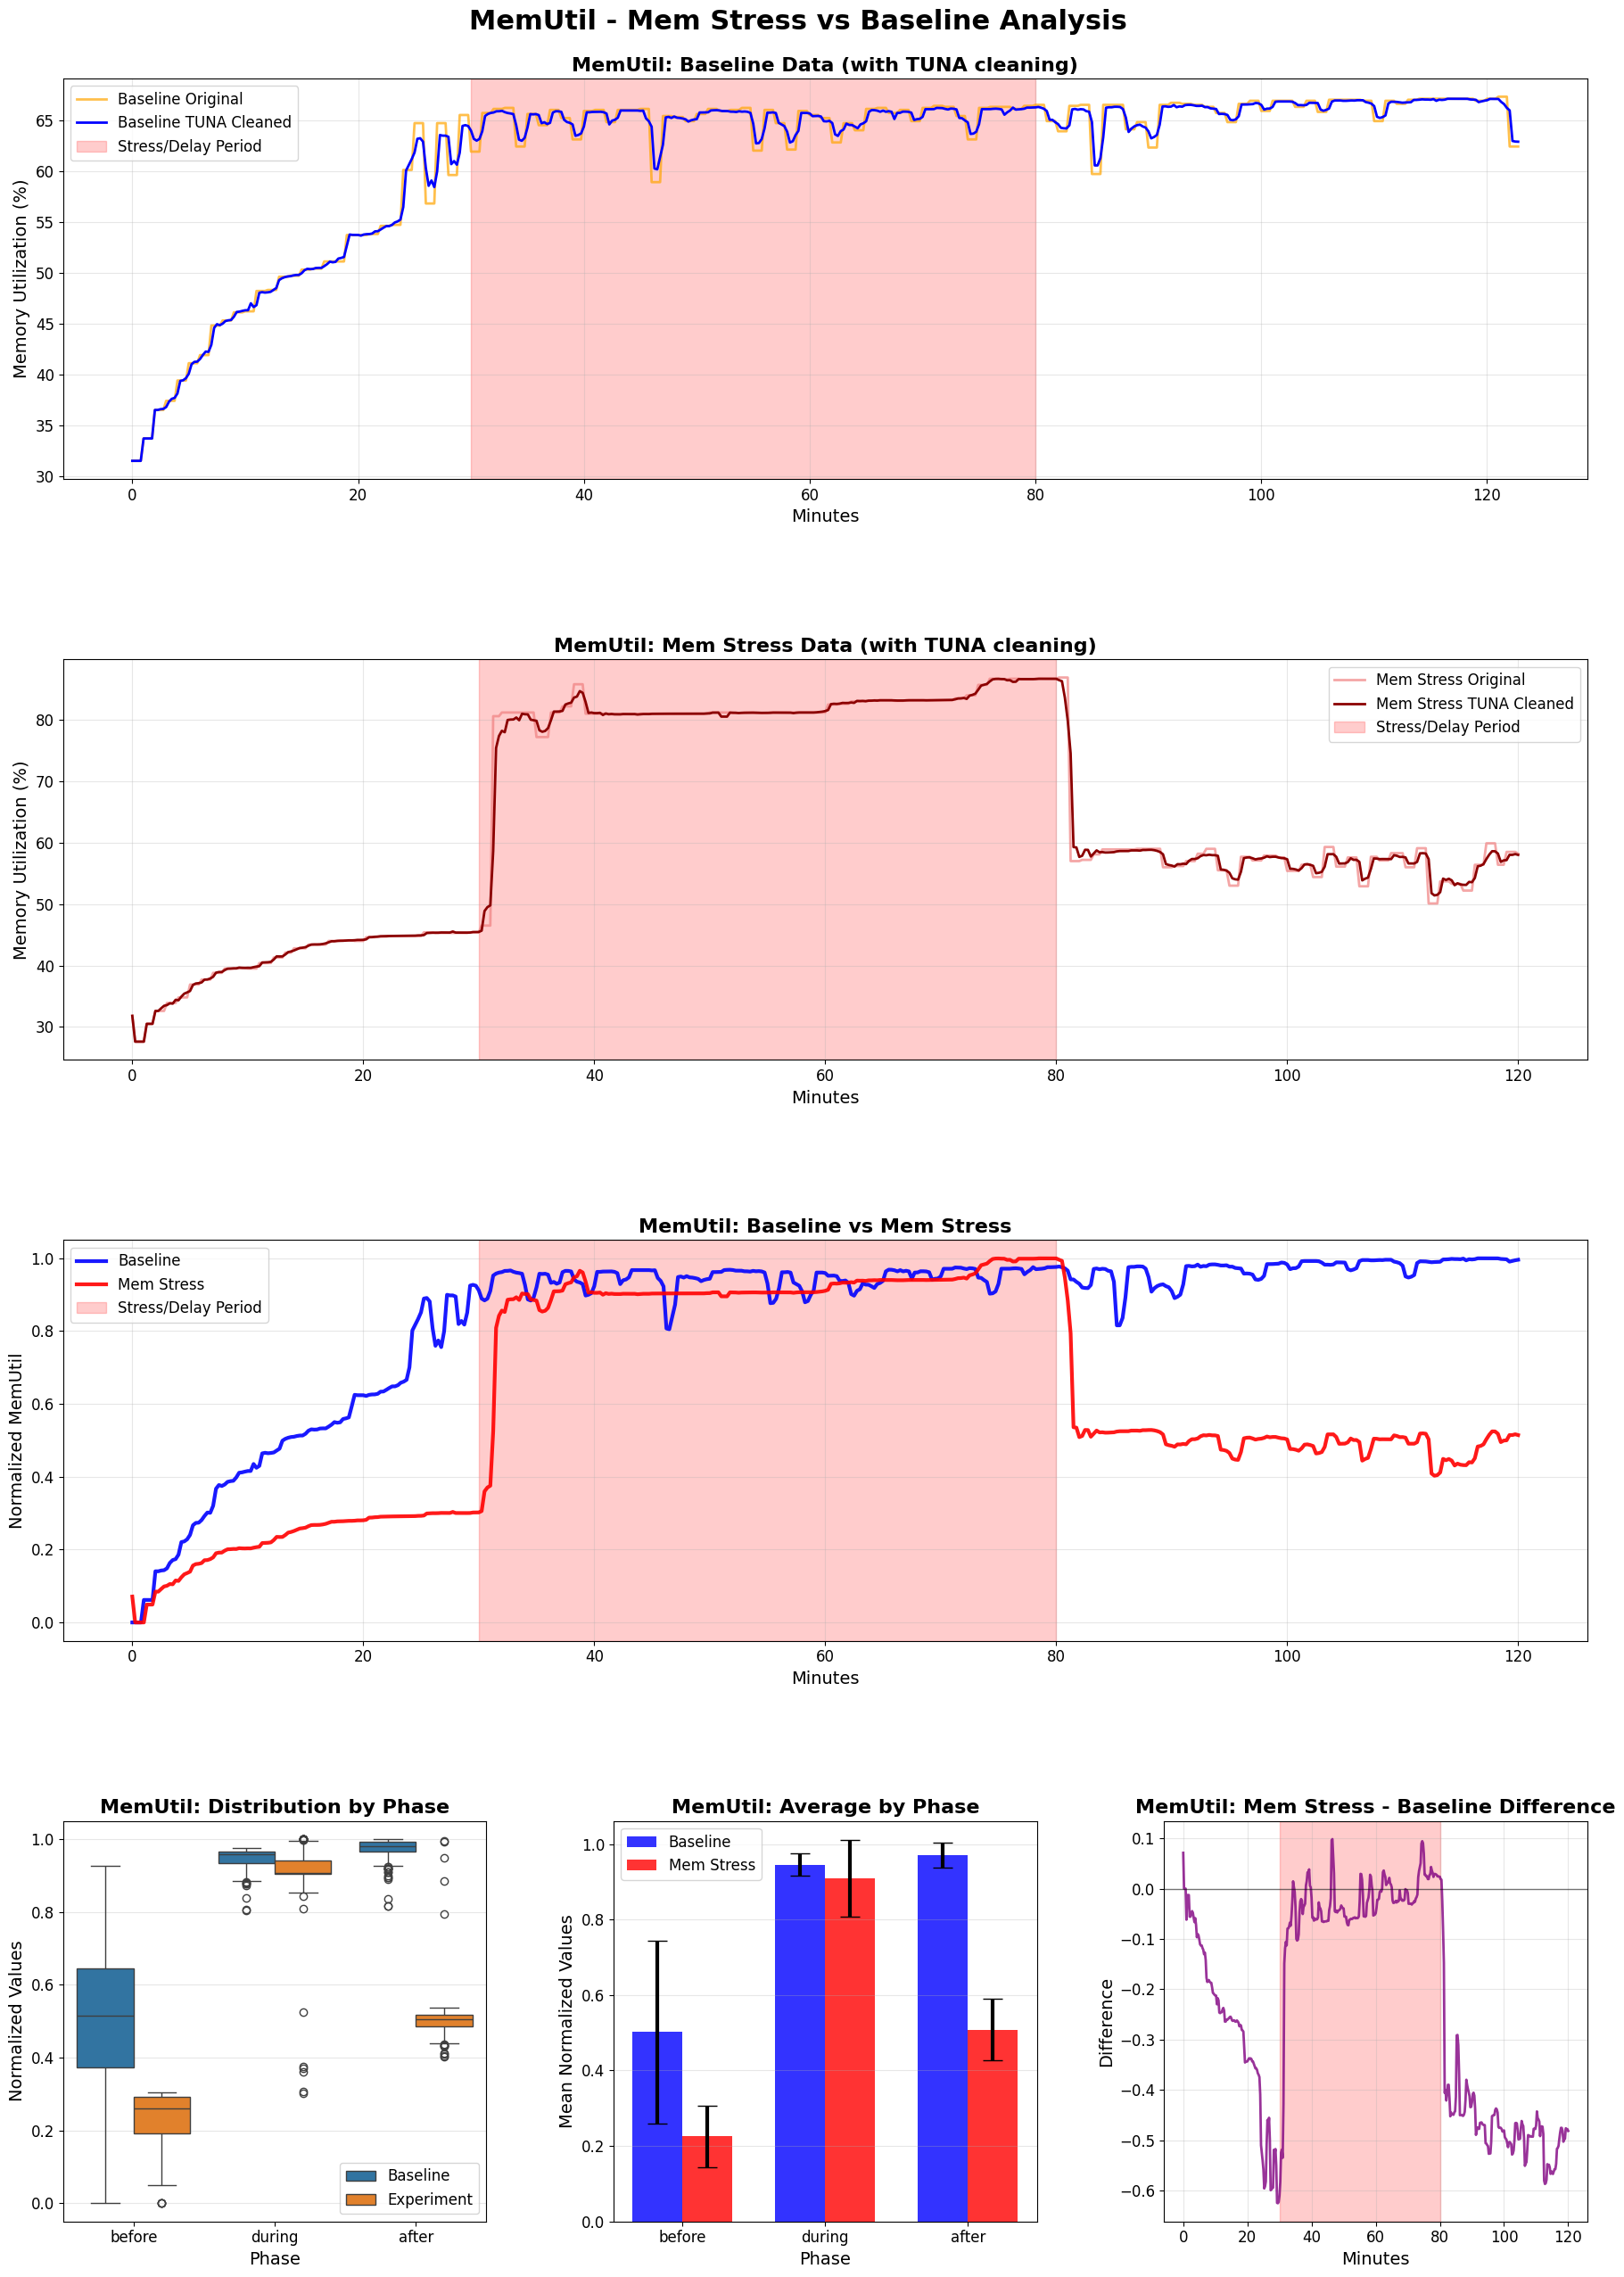


MEMUTIL - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 0 outliers removed
    Noise Reduction: 0.9%, Correlation: 0.996
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9709  0.0331  0.8159  1.0000
before  0.5020  0.2421  0.0000  0.9272
during  0.9457  0.0298  0.8052  0.9763

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.5085  0.0812  0.4029  0.9960
before  0.2252  0.0811  0.0000  0.3034
during  0.9091  0.1017  0.3021  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 11.87, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  4.90, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= 66.70, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -55.13% (DECREASE)
  DURING  :   -3.87% (DECREASE)
  AFTER   :  -47.63% (DECREASE)

MEMORY METRICS DETAILS:
  Metric

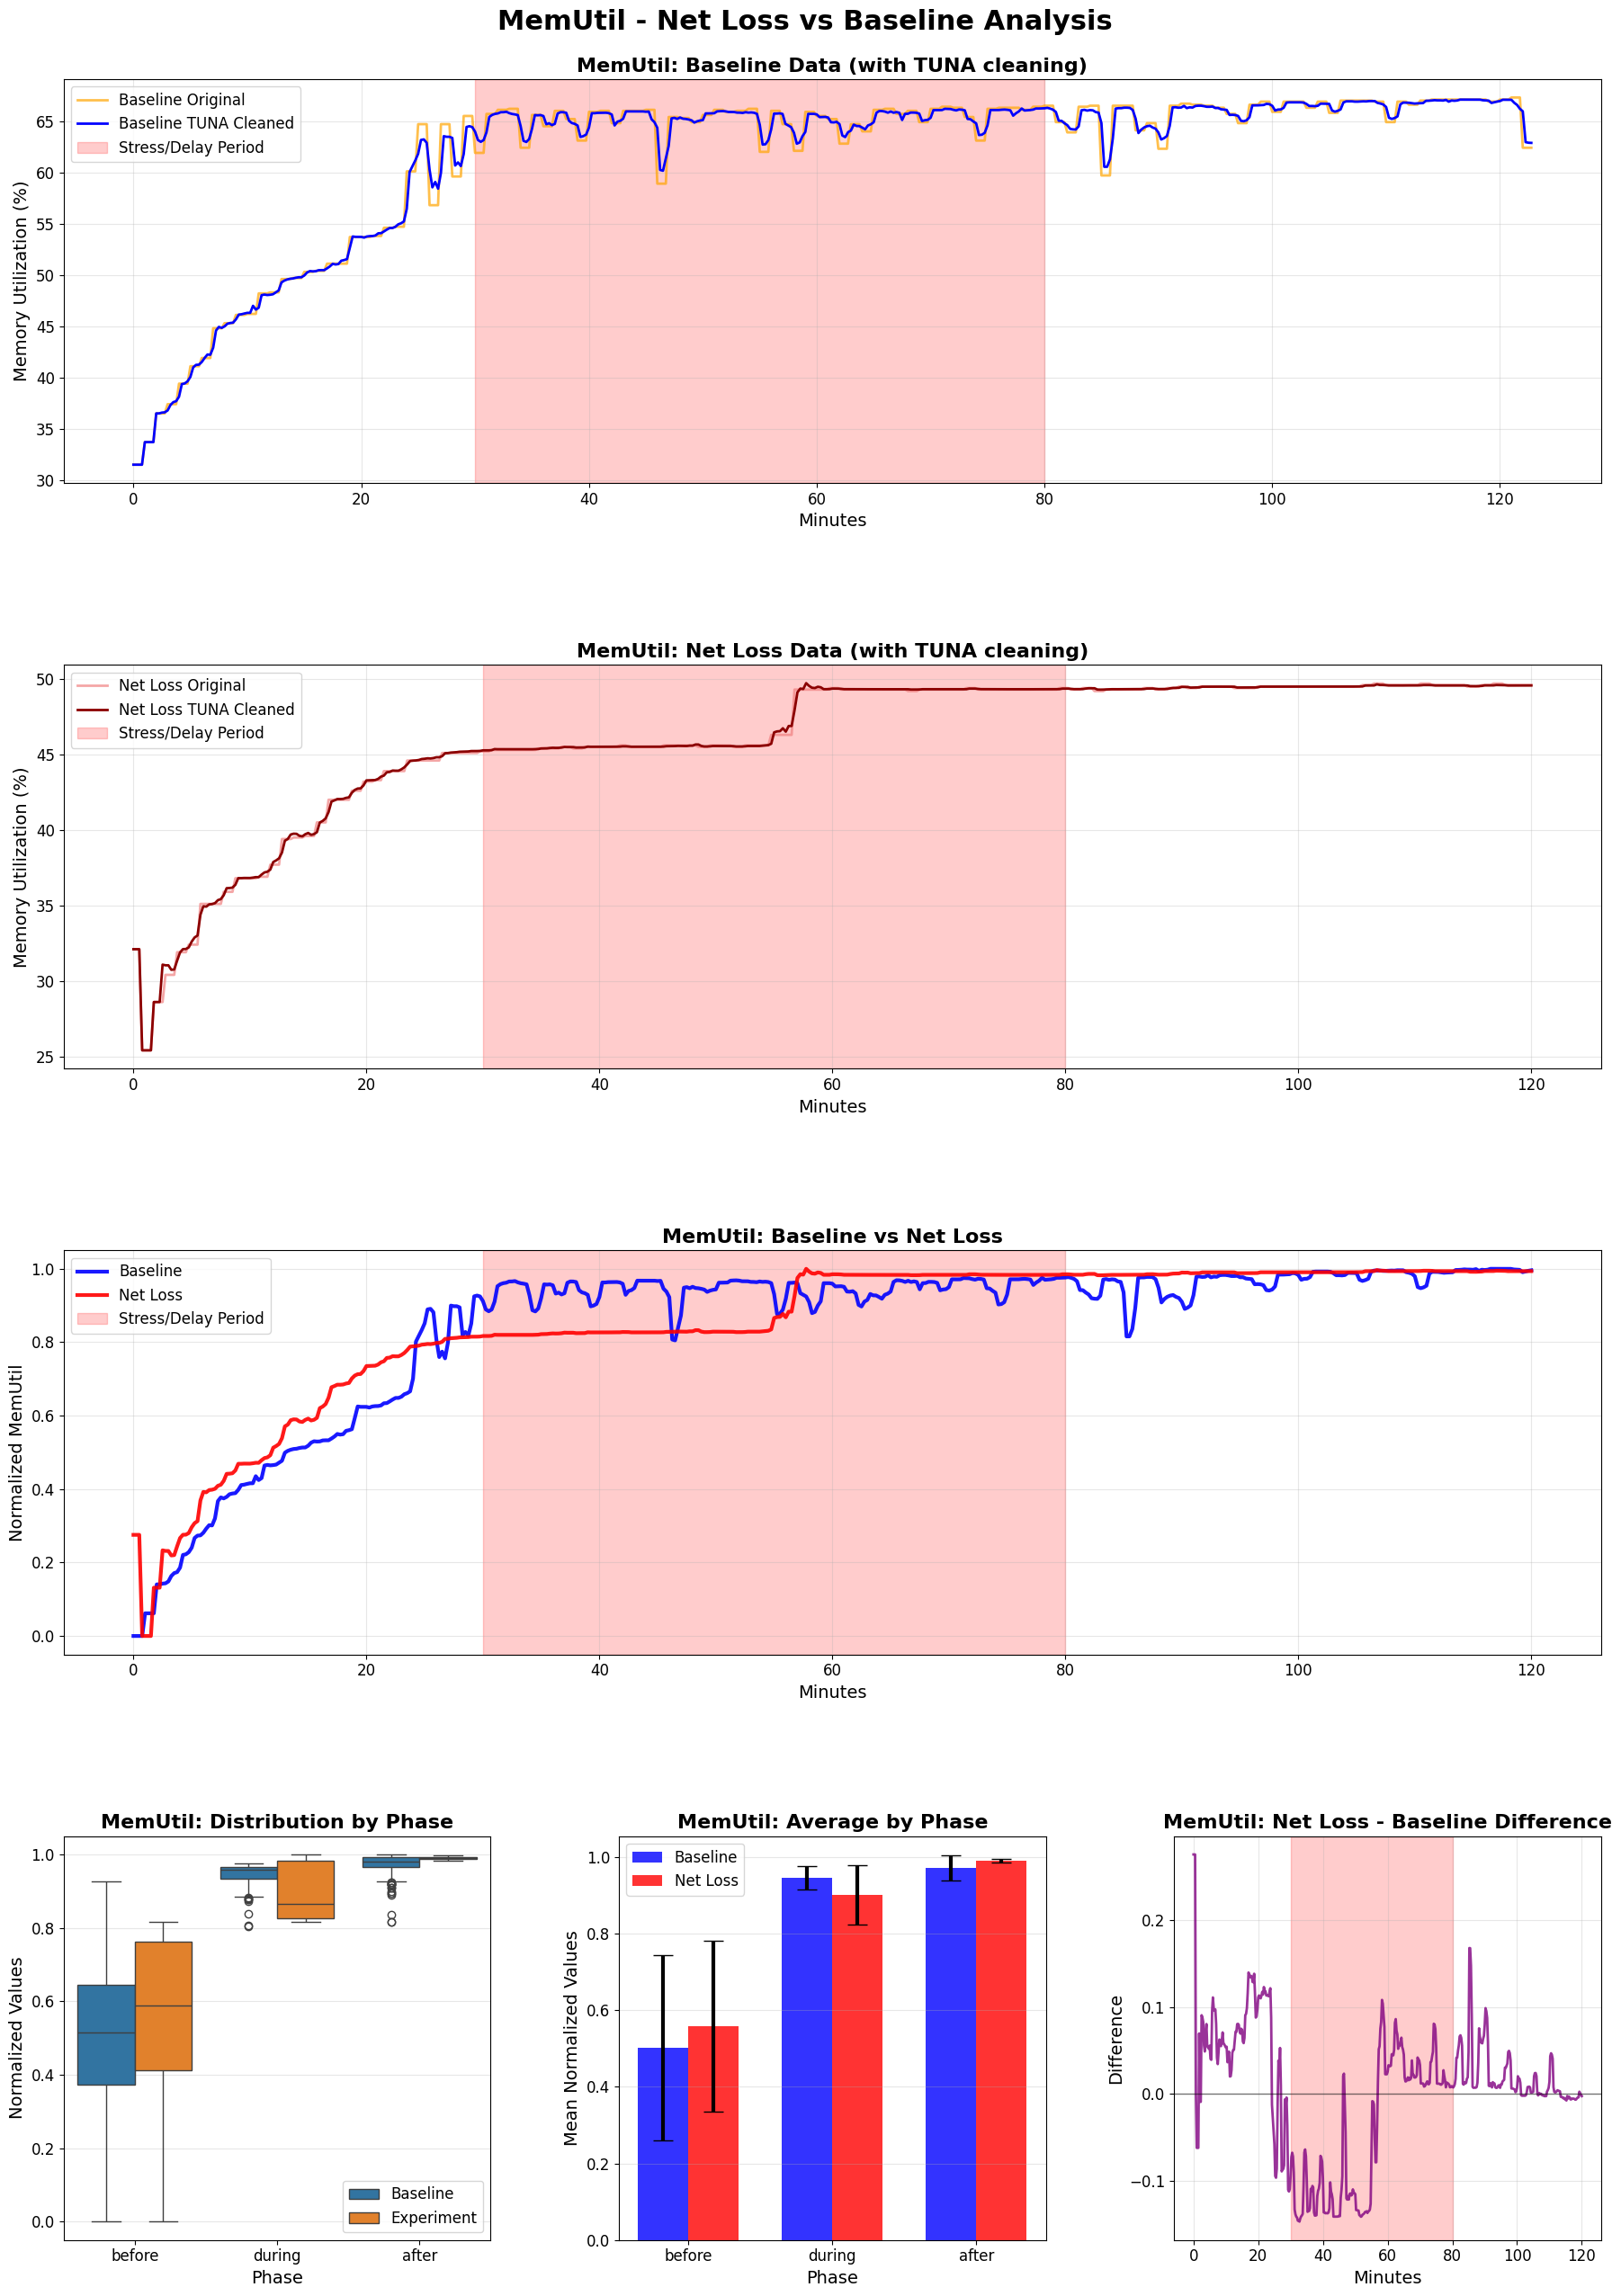


MEMUTIL - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 0.7%, Correlation: 0.999
  BASELINE: 0 outliers removed
    Noise Reduction: 0.5%, Correlation: 0.995

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9709  0.0331  0.8159  1.0000
before  0.5020  0.2421  0.0000  0.9272
during  0.9457  0.0298  0.8052  0.9763

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.9900  0.0037  0.9824  0.9966
before  0.5589  0.2228  0.0000  0.8155
during  0.9012  0.0779  0.8170  1.0000

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -1.90, p=  0.0592 (NOT SIGNIFICANT)
  DURING  : t=  7.56, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -7.26, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  +11.34% (INCREASE)
  DURING  :   -4.70% (DECREASE)
  AFTER   :   +1.97% (INCREASE)

MEMORY METRICS DETAILS:
  Metric: Me

In [3]:
def normalize_series(series):
    if len(series) == 0:
        return series
    
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series(np.zeros(len(series)), index=series.index if hasattr(series, 'index') else None)

def extract_memory_values(df):
    """Extract memory values from the dataframe"""
    # First, ensure we have a Minutes column
    if 'Minutes' not in df.columns and 'Time' in df.columns:
        df['Time'] = pd.to_datetime(df['Time'])
        start_time = df['Time'].iloc[0]
        df['Minutes'] = (df['Time'] - start_time).dt.total_seconds() / 60
    
    # Extract memory values - adjust column names based on your data
    if 'mem_cache' in df.columns:
        return df['mem_cache'].values
    elif 'MemCache' in df.columns:
        return df['MemCache'].values
    elif 'MemAvailable' in df.columns:
        return df['MemAvailable'].values
    elif 'MemUtil' in df.columns:
        return df['MemUtil'].values
    else:
        # Return the second column (assuming first is Time)
        return df.iloc[:, 1].values

def get_memory_y_axis_label(metric_name):
    labels = {
        'MemAvailable': 'Memory Available (KB)',
        'MemCache': 'Memory Cache (KB)', 
        'MemUtil': 'Memory Utilization (%)',
        'mem_cache': 'Memory Cache (KB)'
    }
    return labels.get(metric_name, 'Memory Value')

def extract_tuna_cleaned_data(tuna_results, metric_name, experiment_name):
    """Extract cleaned data from TUNA results with the correct structure"""
    if not tuna_results or metric_name not in tuna_results:
        return None, None
    
    if experiment_name not in tuna_results[metric_name]:
        return None, None
        
    exp_results = tuna_results[metric_name][experiment_name]
    
    # Check if this is the new column-by-column structure
    if 'column_results' in exp_results:
        column_results = exp_results['column_results']
        
        # For memory analysis, we typically want the first/main column
        # or we can aggregate multiple columns
        if len(column_results) == 1:
            # Single column case
            col_name = list(column_results.keys())[0]
            col_data = column_results[col_name]
            return col_data['cleaned'], col_data['outliers']
        else:
            # Multiple columns - take the first one or aggregate
            # You can modify this logic based on your needs
            col_name = list(column_results.keys())[0]
            col_data = column_results[col_name]
            return col_data['cleaned'], col_data['outliers']
    else:
        # Legacy structure (if any)
        if 'cleaned' in exp_results and 'outliers' in exp_results:
            return exp_results['cleaned'], exp_results['outliers']
    
    return None, None

def analyze_and_plot_memory_comparison(metric_name, experiment_name, experiment_df, baseline_df, 
                                     tuna_results=None, delay_minutes=30, duration_minutes=50):
    
    # Extract memory values using the proper function
    experiment_values = extract_memory_values(experiment_df)
    baseline_values = extract_memory_values(baseline_df)
    
    experiment_cleaned = None
    baseline_cleaned = None
    experiment_outliers = None
    baseline_outliers = None
    
    # Safe access to tuna_results with the correct structure
    if tuna_results and metric_name in tuna_results:
        # Extract experiment data
        exp_cleaned, exp_outliers = extract_tuna_cleaned_data(tuna_results, metric_name, experiment_name)
        if exp_cleaned is not None:
            experiment_cleaned = exp_cleaned
            experiment_outliers = exp_outliers
        
        # Extract baseline data
        baseline_cleaned_data, baseline_outliers_data = extract_tuna_cleaned_data(tuna_results, metric_name, 'baseline')
        if baseline_cleaned_data is not None:
            baseline_cleaned = baseline_cleaned_data
            baseline_outliers = baseline_outliers_data
    
    # Use cleaned data if available, otherwise use original
    experiment_series = experiment_cleaned if experiment_cleaned is not None else experiment_values
    baseline_series = baseline_cleaned if baseline_cleaned is not None else baseline_values
    
    # Convert to pandas Series for normalization
    experiment_norm = normalize_series(pd.Series(experiment_series))
    baseline_norm = normalize_series(pd.Series(baseline_series))
    
    # Ensure we have Minutes columns
    if 'Minutes' not in experiment_df.columns:
        experiment_df['Minutes'] = range(len(experiment_df))
    if 'Minutes' not in baseline_df.columns:
        baseline_df['Minutes'] = range(len(baseline_df))
    
    # Find minimum length for alignment
    min_length = min(len(experiment_norm), len(baseline_norm), 
                    len(experiment_df['Minutes']), len(baseline_df['Minutes']))
    
    # Create combined dataframe
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm.iloc[:min_length],
        'Experiment': experiment_norm.iloc[:min_length],
        'Minutes': experiment_df['Minutes'].iloc[:min_length],
        'Baseline_Minutes': baseline_df['Minutes'].iloc[:min_length]
    })
    
    # Calculate difference
    df_combined['difference'] = df_combined['Experiment'] - df_combined['Baseline']
    
    # Define phases
    df_combined['phase'] = 'before'
    df_combined.loc[(df_combined['Minutes'] >= delay_minutes) & 
                   (df_combined['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df_combined.loc[df_combined['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    
    # Calculate statistics by phase
    stats_baseline = df_combined.groupby('phase')['Baseline'].agg(['mean', 'std', 'min', 'max'])
    stats_experiment = df_combined.groupby('phase')['Experiment'].agg(['mean', 'std', 'min', 'max'])
    
    # Statistical tests
    t_tests = {}
    available_phases = stats_baseline.index.tolist()
    
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            data = df_combined[df_combined['phase'] == phase]
            if len(data) > 1:
                t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['Experiment'].dropna())
                t_tests[phase] = {'t': t_stat, 'p': p_value}
            else:
                t_tests[phase] = {'t': 0, 'p': 1}
        else:
            t_tests[phase] = {'t': 0, 'p': 1, 'note': 'Phase not present in data'}
    
    # Calculate impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            baseline_mean = stats_baseline.loc[phase, 'mean']
            experiment_mean = stats_experiment.loc[phase, 'mean']
            if baseline_mean != 0:
                impact[phase] = ((experiment_mean - baseline_mean) / baseline_mean) * 100
            else:
                impact[phase] = 0
        else:
            impact[phase] = 0
    
    # Create plots
    fig = plt.figure(figsize=(18, 26))
    
    y_label = get_memory_y_axis_label(metric_name)
    
    # Plot 1: Baseline Data
    plt.subplot(4, 1, 1)
    plt.plot(baseline_df['Minutes'][:len(baseline_values)], baseline_values, 
             label='Baseline Original', color='orange', alpha=0.7, linewidth=2)
    
    if baseline_cleaned is not None:
        plt.plot(baseline_df['Minutes'][:len(baseline_cleaned)], baseline_cleaned, 
                 label='Baseline TUNA Cleaned', linewidth=2, color='blue')
        
        if baseline_outliers is not None:
            outlier_points = np.where(baseline_outliers)[0]
            if len(outlier_points) > 0:
                plt.scatter(baseline_df['Minutes'].iloc[outlier_points], 
                           baseline_values[outlier_points], 
                           c='red', s=15, alpha=0.7, label='Outliers', zorder=5)
        
        title_suffix = " (with TUNA cleaning)"
    else:
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: Baseline Data{title_suffix}', fontsize=16, fontweight='bold')
    plt.xlabel('Minutes', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Plot 2: Experiment Data
    plt.subplot(4, 1, 2)
    plt.plot(experiment_df['Minutes'][:len(experiment_values)], experiment_values, 
             label=f'{experiment_name.replace("_", " ").title()} Original', 
             alpha=0.7, color='lightcoral', linewidth=2)
    
    if experiment_cleaned is not None:
        plt.plot(experiment_df['Minutes'][:len(experiment_cleaned)], experiment_cleaned, 
                 label=f'{experiment_name.replace("_", " ").title()} TUNA Cleaned', 
                 linewidth=2, color='darkred')
        
        if experiment_outliers is not None:
            outlier_points = np.where(experiment_outliers)[0]
            if len(outlier_points) > 0:
                plt.scatter(experiment_df['Minutes'].iloc[outlier_points], 
                           experiment_values[outlier_points], 
                           c='red', s=15, alpha=0.7, label='Outliers', zorder=5)
        
        title_suffix = " (with TUNA cleaning)"
    else:
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} Data{title_suffix}', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Minutes', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Plot 3: Comparison
    plt.subplot(4, 1, 3)
    plt.plot(df_combined['Minutes'], df_combined['Baseline'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(df_combined['Minutes'], df_combined['Experiment'], 
             label=f'{experiment_name.replace("_", " ").title()}', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f"{metric_name}: Baseline vs {experiment_name.replace('_', ' ').title()}", 
              fontsize=16, fontweight='bold')
    plt.xlabel("Minutes", fontsize=14)
    plt.ylabel(f"Normalized {metric_name}", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Plot 4: Box plot
    plt.subplot(4, 3, 10)
    box_data = pd.melt(df_combined[['Baseline', 'Experiment', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{metric_name}: Distribution by Phase', fontsize=16, fontweight='bold')
    plt.xlabel('Phase', fontsize=14)
    plt.ylabel('Normalized Values', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Plot 5: Bar chart
    plt.subplot(4, 3, 11)
    phases_to_plot = [p for p in ['before', 'during', 'after'] if p in available_phases]
    
    if len(phases_to_plot) > 0:
        x = np.arange(len(phases_to_plot))
        width = 0.35
        
        baseline_means = [stats_baseline.loc[p, 'mean'] for p in phases_to_plot]
        baseline_stds = [stats_baseline.loc[p, 'std'] for p in phases_to_plot]
        experiment_means = [stats_experiment.loc[p, 'mean'] for p in phases_to_plot]
        experiment_stds = [stats_experiment.loc[p, 'std'] for p in phases_to_plot]
        
        bars1 = plt.bar(x - width/2, baseline_means, width, 
                       label='Baseline', alpha=0.8, color='blue')
        bars2 = plt.bar(x + width/2, experiment_means, width, 
                       label=f'{experiment_name.replace("_", " ").title()}', alpha=0.8, color='red')
        
        plt.errorbar(x - width/2, baseline_means, yerr=baseline_stds, 
                    fmt='none', ecolor='black', capsize=8, linewidth=3)
        plt.errorbar(x + width/2, experiment_means, yerr=experiment_stds, 
                    fmt='none', ecolor='black', capsize=8, linewidth=3)
        
        plt.xticks(x, phases_to_plot)
    else:
        plt.text(0.5, 0.5, 'No phase data available', ha='center', va='center', 
                transform=plt.gca().transAxes, fontsize=14)
    
    plt.title(f'{metric_name}: Average by Phase', fontsize=16, fontweight='bold')
    plt.xlabel('Phase', fontsize=14)
    plt.ylabel('Mean Normalized Values', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    # Plot 6: Difference plot
    plt.subplot(4, 3, 12)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} - Baseline Difference', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Minutes', fontsize=14)
    plt.ylabel('Difference', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.suptitle(f'{metric_name} - {experiment_name.replace("_", " ").title()} vs Baseline Analysis', 
                fontsize=22, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.45, wspace=0.3)
    plt.show()
    
    # Print summary
    print(f"\n{'='*80}")
    print(f"{metric_name.upper()} - {experiment_name.upper().replace('_', ' ')} VS BASELINE ANALYSIS")
    print(f"{'='*80}")
    
    if tuna_results and metric_name in tuna_results:
        print(f"\nTUNA CLEANING SUMMARY:")
        if experiment_name in tuna_results[metric_name]:
            exp_stats = tuna_results[metric_name][experiment_name]['stats']
            print(f"  {experiment_name.upper().replace('_', ' ')}: {exp_stats['outliers']} outliers removed")
            print(f"    Noise Reduction: {exp_stats['noise_reduction']:.1f}%, Correlation: {exp_stats['correlation']:.3f}")
        
        if 'baseline' in tuna_results[metric_name]:
            base_stats = tuna_results[metric_name]['baseline']['stats']
            print(f"  BASELINE: {base_stats['outliers']} outliers removed")
            print(f"    Noise Reduction: {base_stats['noise_reduction']:.1f}%, Correlation: {base_stats['correlation']:.3f}")
    
    print(f"\nBASELINE STATISTICS BY PHASE:")
    if len(stats_baseline) > 0:
        print(stats_baseline.round(4))
    else:
        print("  No phase data available")
    
    print(f"\n{experiment_name.upper().replace('_', ' ')} STATISTICS BY PHASE:")
    if len(stats_experiment) > 0:
        print(stats_experiment.round(4))
    else:
        print("  No phase data available")
    
    print(f"\nSTATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        if 'note' in test:
            print(f"  {phase.upper():8}: {test['note']}")
        else:
            sig = "SIGNIFICANT" if test['p'] < 0.05 else "NOT SIGNIFICANT"
            print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n{experiment_name.upper().replace('_', ' ')} IMPACT:")
    for phase, change in impact.items():
        if change == 0 and phase not in available_phases:
            print(f"  {phase.upper():8}: Phase not present in data")
        else:
            direction = "INCREASE" if change > 0 else "DECREASE" if change < 0 else "NO CHANGE"
            print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    print(f"\nMEMORY METRICS DETAILS:")
    print(f"  Metric: {metric_name}")
    print(f"  Metric type: {y_label}")
    print(f"  Data points analyzed: {len(df_combined)}")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_experiment': stats_experiment,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'tuna_info': {
            'experiment_cleaned': experiment_cleaned is not None,
            'baseline_cleaned': baseline_cleaned is not None
        }
    }

def run_comprehensive_memory_analysis(all_datasets, tuna_results=None, delay_minutes=30, duration_minutes=50):
    analysis_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"\n🔍 Analyzing {metric_name}...")
        analysis_results[metric_name] = {}
        
        baseline_df = experiments['baseline']
        
        for experiment_name, experiment_df in experiments.items():
            if experiment_name != 'baseline':
                print(f"\n📊 Comparing {metric_name}: {experiment_name} stress vs baseline")
                
                result = analyze_and_plot_memory_comparison(
                    metric_name=metric_name,
                    experiment_name=experiment_name,
                    experiment_df=experiment_df,
                    baseline_df=baseline_df,
                    tuna_results=tuna_results,
                    delay_minutes=delay_minutes,
                    duration_minutes=duration_minutes
                )
                
                analysis_results[metric_name][experiment_name] = result
    
    return analysis_results

memory_results = run_comprehensive_memory_analysis(all_datasets, tuna_results, delay_minutes=30, duration_minutes=50)